# Gaussian Processes - from zero to hero

In [1]:
# Imports 
from IPython.display import Image
from IPython.core.display import HTML 
gaussian_img_path = "./Grafiken/"
from IPython.core.display import SVG

## Grundlagen der Wahrscheinlichkeitstheorie
Bevor wir uns mit Gaußschen Prozesse beschäftigen, wiederholen wir zunächst kurz die Grundlagen der Wahrscheinlichkeitstheorie.


### Zufallsvariablen 
Einfach gesprochen: Eine Zufallsvariable (Random Variable) ist eine __numerische Größe, die zufällige Werte annimmt__.
Sie ist eine Funktion über den Outcome eines Zufallsexperiments, wie z.B. dem Ziehen von Murmeln aus einer Urne oder dem zufälligen Auswählen einer Person aus einer Gruppe.


__Beispiel__ Zufallsvariable:<br>
	Wähle aus einer Mengen von Personen $P$ zufällig eine Person $p\in P$ aus. Das Gewicht der Person wird dann durch die Zufallsvariable $W(p)$ beschrieben.


__Stetige Zufallsvariablen__<br>
_TODO_<br>
__Diskrete Zufallsvariablen__<br>
_TODO_<br>

### Wahrscheinlichkeitsfunktion 
Eine Wahrscheinlichkeitsfunktion $\mathcal{P}(x)$ weist jedem Ereignis der Zufallsvariablen $X$ eine Wahrscheinlichkeit zu: 
	$$p(x) = \mathcal{P}(X=x)$$

__Übersicht für eine diskrete Zufallsvariable und ihre Wahrscheinlichekeitsfunktion:__

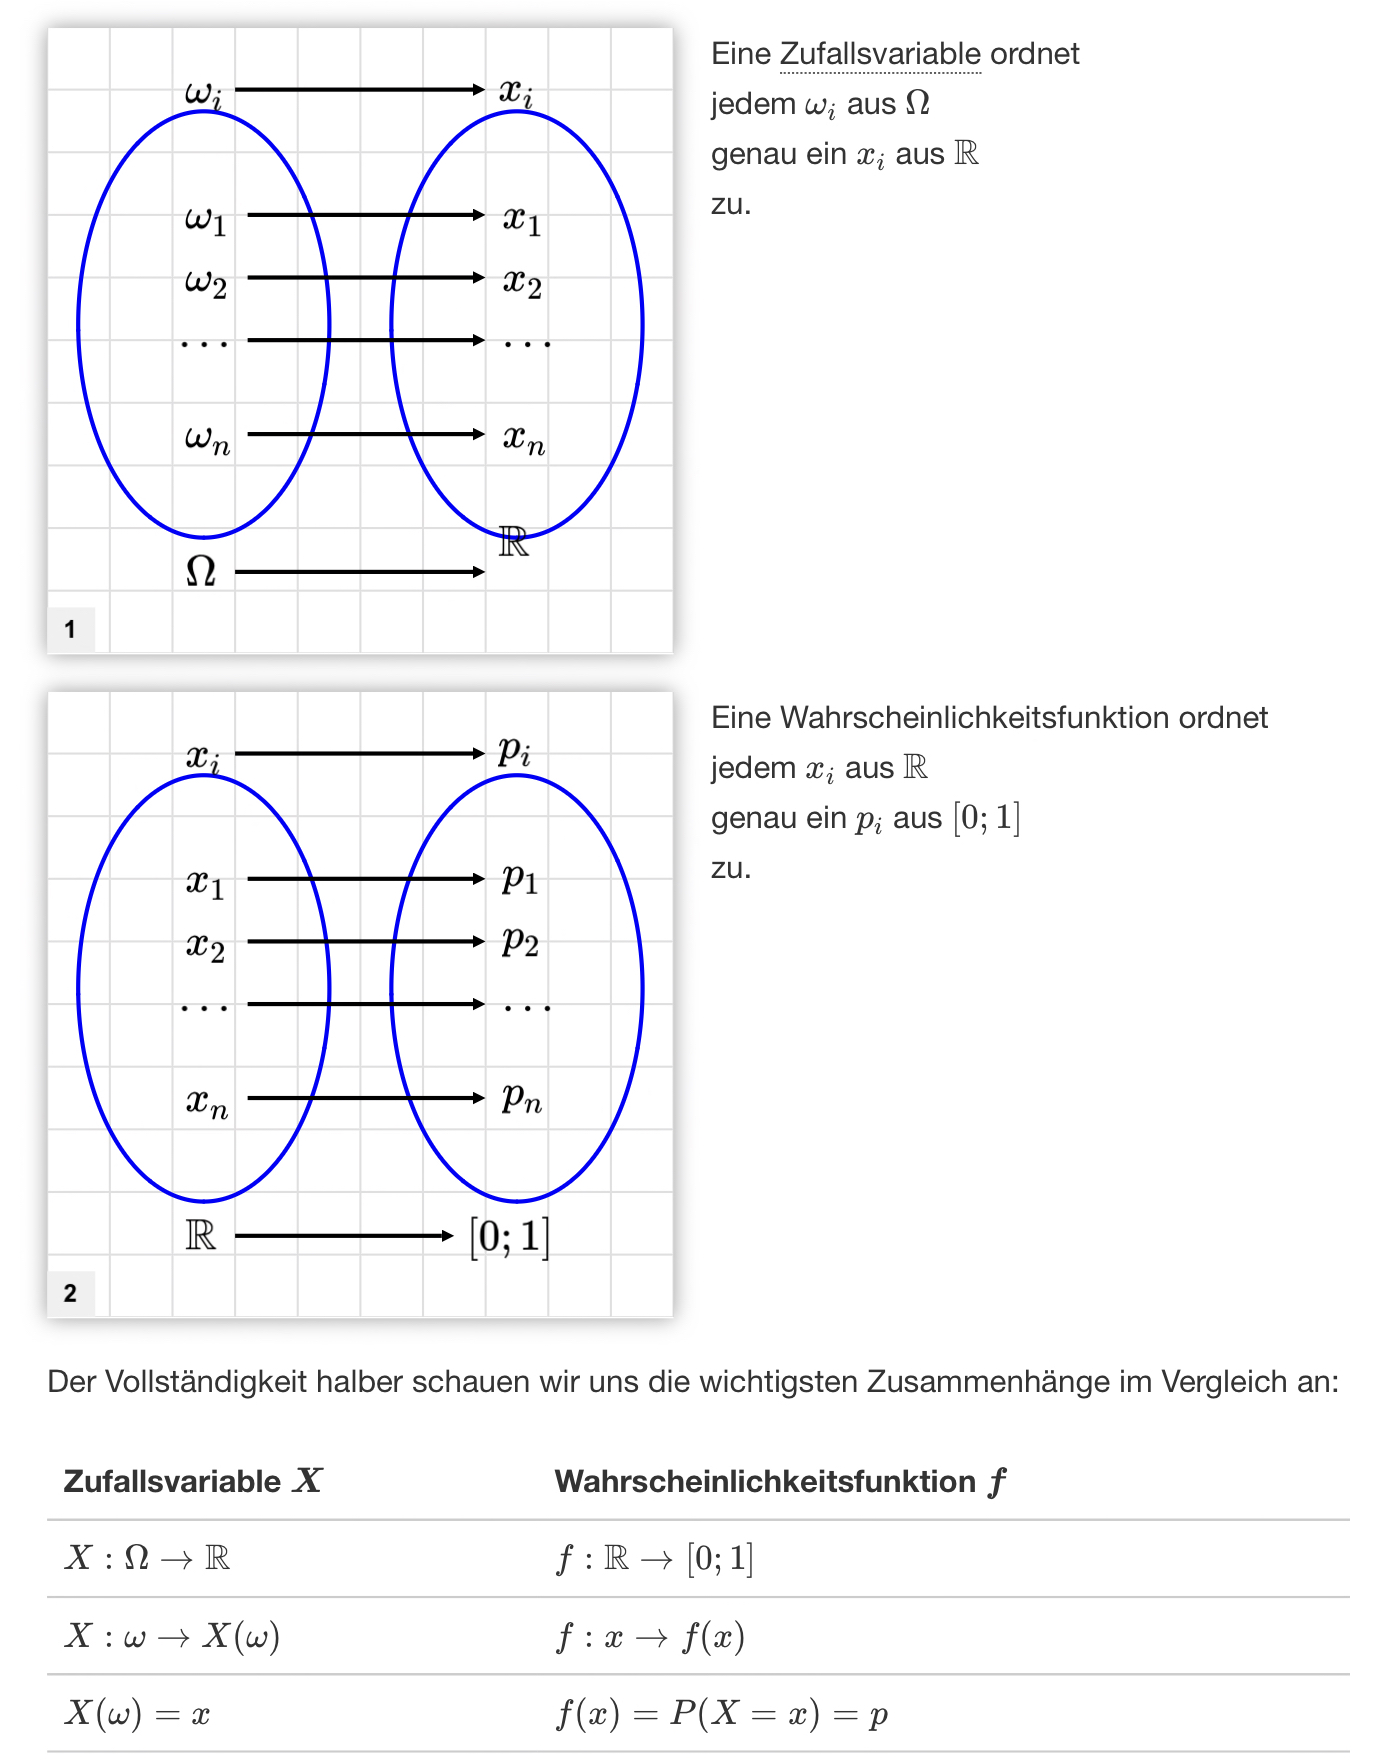

In [2]:
Image(filename = gaussian_img_path + "Diskrete_Zufallsvariable.jpeg", width=300, height=300)

_Anmerkung:_ Für stetige Zufallsvariablen gilt $P(X=x)=0$

### Verteilungen / Verteilungsfunktion
Für eine Zufallsvariable $X$ ist die Kumulative Verteilungsfunktion (CDF) definiert als 

$$F_X(x) = \mathcal{P}(X\le x)$$

__CDF diskreter Zufallsvariablen__
$$F_X(x) = \mathcal{P}(X\le x) = \sum_{k\le x}p_X(k)$$


__CDF stetiger Zufallsvariablen__
$$F_X(x) = \mathcal{P}(X\le x) = \int_{-\inf}^x f_X(t)dt$$


Dabei ist $f_X(x) = \dfrac{\partial F_X(x)}{\partial x}$ die Wahrscheinlichkeitsdichtefunktion (PDF).

### Stochastitsche Unabhängigkeit
__Unabhängigkeit von zwei Zufallsvariablen:__ <br>

__Unabhängigkeit von zwei Ereignissen:__ <br>
Für Ereignisse $A, B \subset \Omega$ gilt:
$$P(A\cap B) = P(A) \cdot P(B)$$

Zwei Zufallsvariablen $X, Y$ heißen stochastisch unabhängig, falls gilt: 

$$p_{X,Y}(x,y) = P(X=x \wedge Y=y) = P(X=x)\cdot P(Y=y) = p_X(x)\cdot p_Y(y)$$

### Bedingte Wahrscheinlichkeit
Betrachten wir folgendes Zufallsexperiment:<br>
	Gegeben sind zwei Schalen A und B mit Murmeln. In Schale A liegen 1 blaue und 4 gelbe. In Schale B liegen 3 blaue und 2 gelbe. Wir ziehen nun zufällig aus einer der beiden Schalen eine Murmel.
1. Frage: Wie hoch ist die Wahrscheinlichkeit eine blaue Murmel zu ziehen?
2. Frage: Wie hoch ist die Wahrscheinlichkeit eine rote Murmel zu ziehen unter der Bedingung, dass wir aus Schale A ziehen? 

Betrachten wir unser Experiment zunächst grafisch:

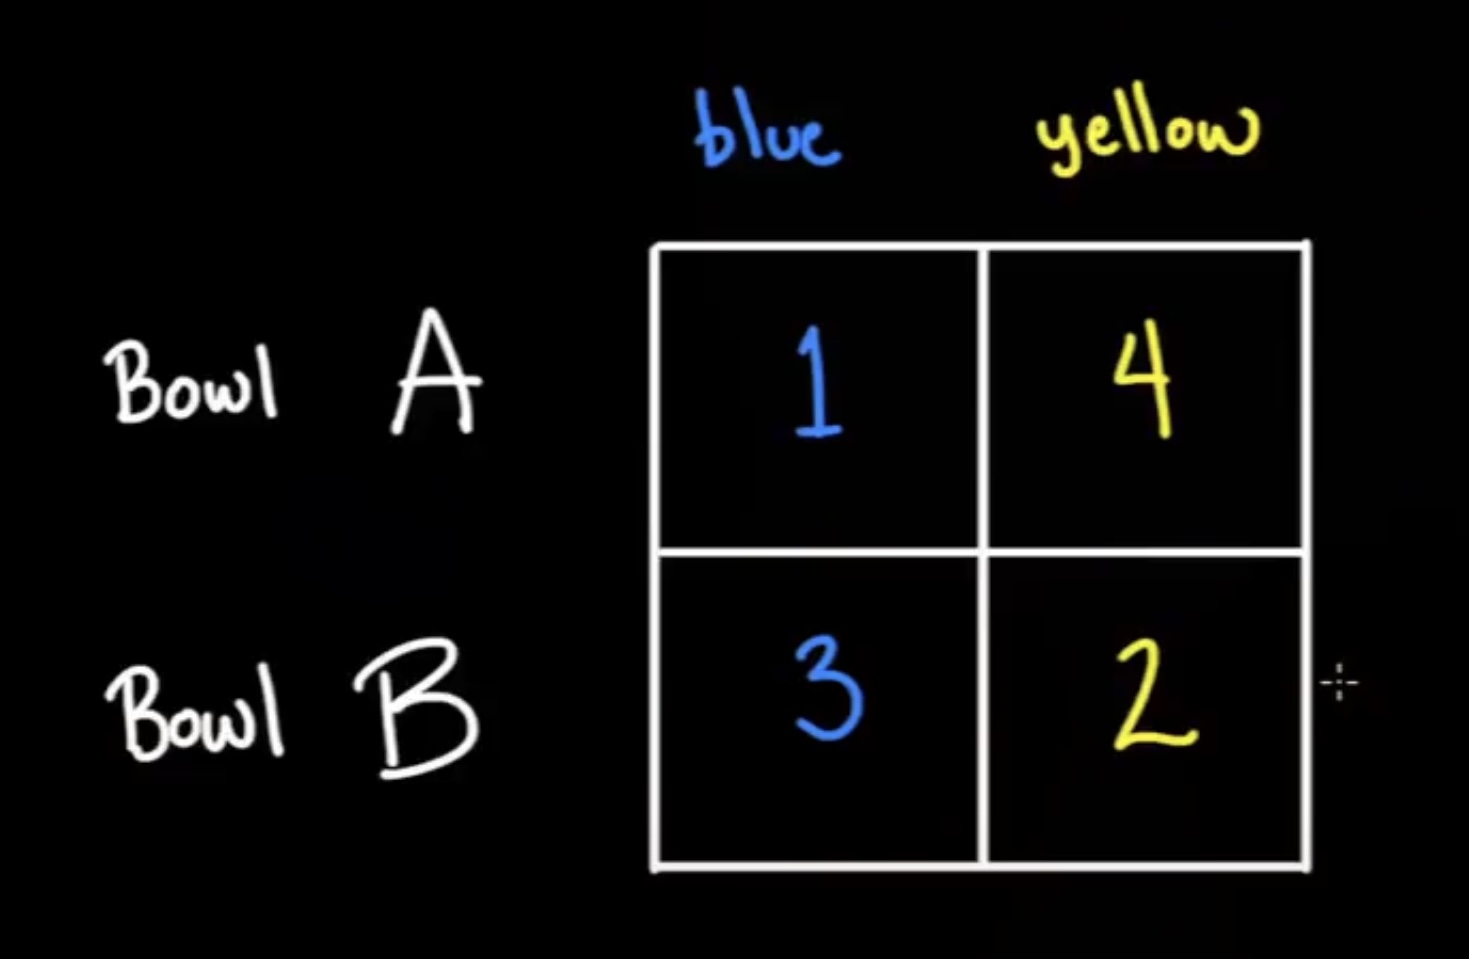

In [3]:
Image(filename = gaussian_img_path + "Bowls.jpg", width=300, height=300)

Es gilt: 
1. $P(blau) = \dfrac{4}{10}$
2. Bedingte Wahrscheinlichkeit bedeutet, dass wir unseren Ereignisraum restringieren / einschränken auf solche Ereignisse, welche die Bedingung erfüllen. Daher gilt $P(blau \vert A) = P(\text{blau aus Schale A}) = \dfrac{1}{4}$

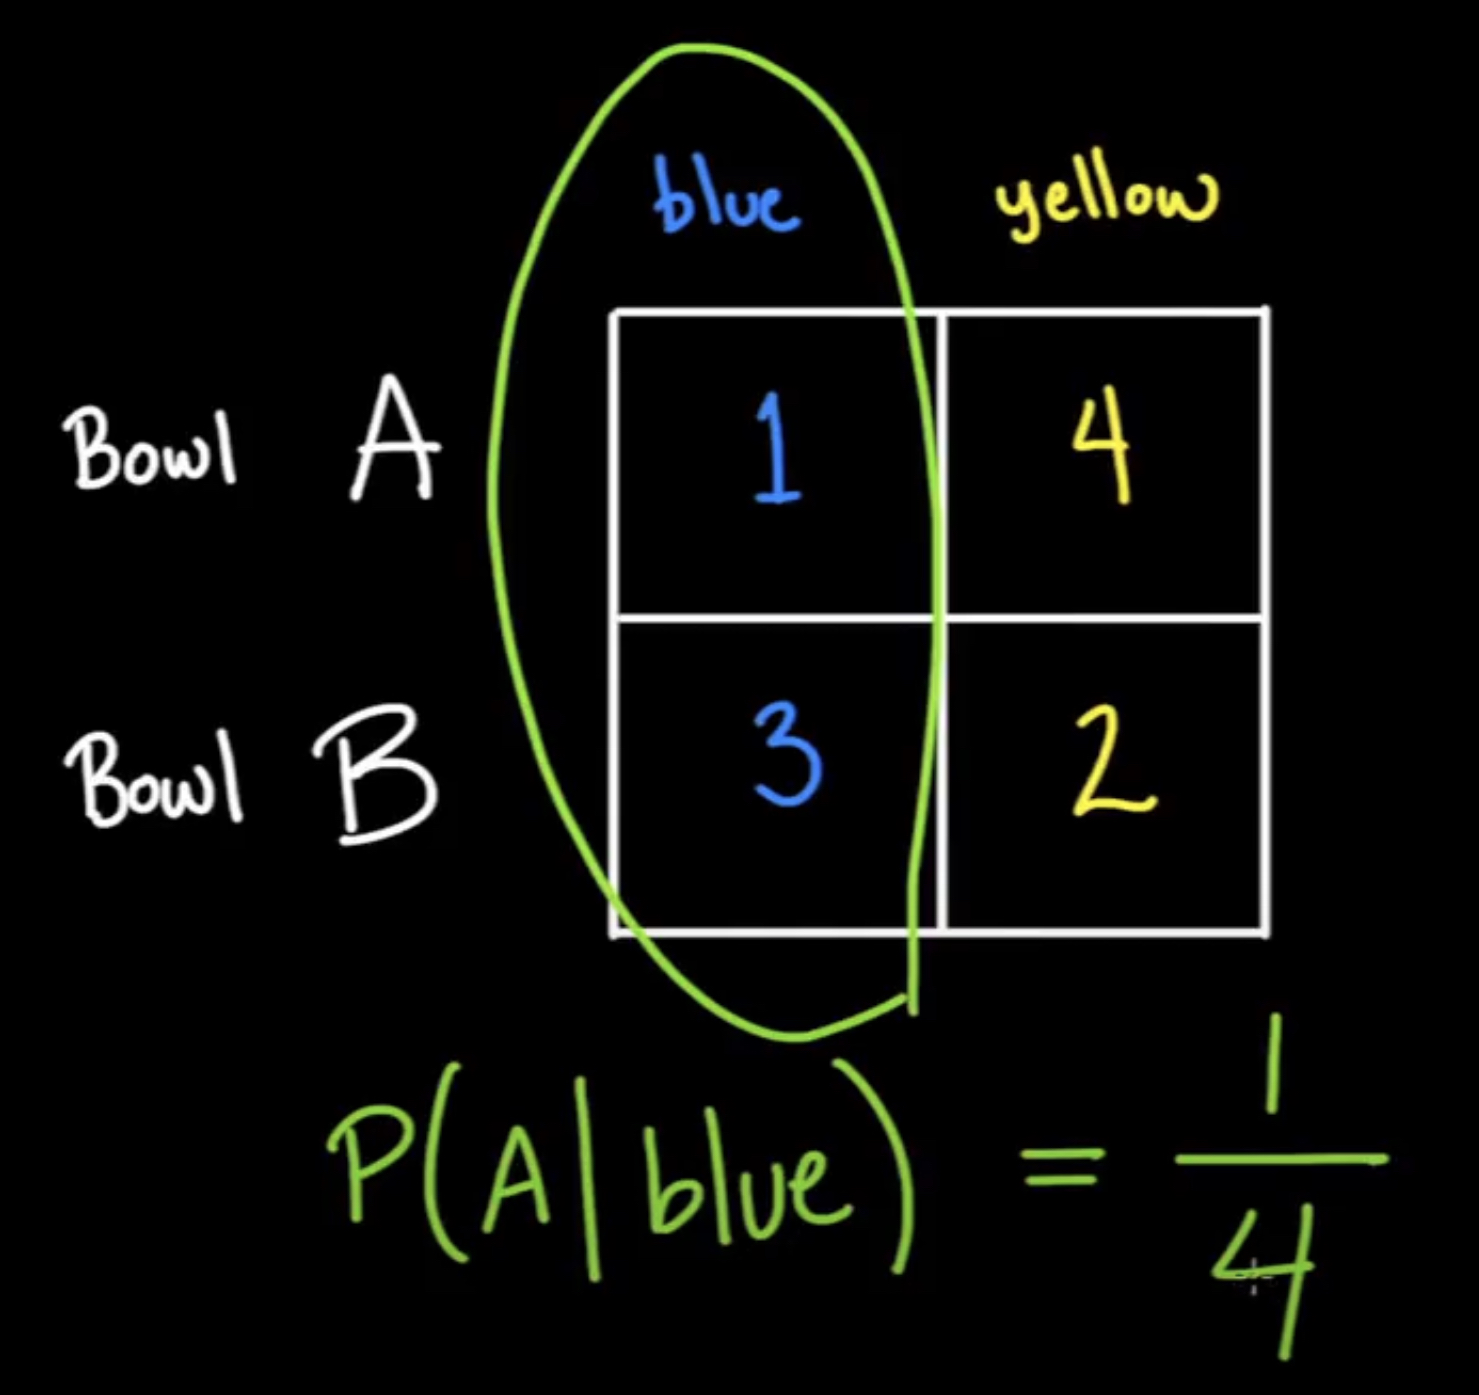

In [4]:
Image(filename = gaussian_img_path + "BedingteWK2.jpeg", width=300, height=300)

__Beispiel bedingte Wahrscheinlichkeit: Medizinische Diagnose__ <br>
Wir nehmen an eine Person wird positiv auf eine Krankheit getestet, die 1 aus 1000 Personen betrifft.
Der Test hat eine Genauigkeit von 99%. Wie hoch ist die Wahrscheinlichkeit, dass die Person tatsächlich erkrankt ist? <br><br>
Wir können uns die Wahrscheinlichkeit der einzelnen Ereignisse zunächst in einem Baumdiagramm anschauen: 

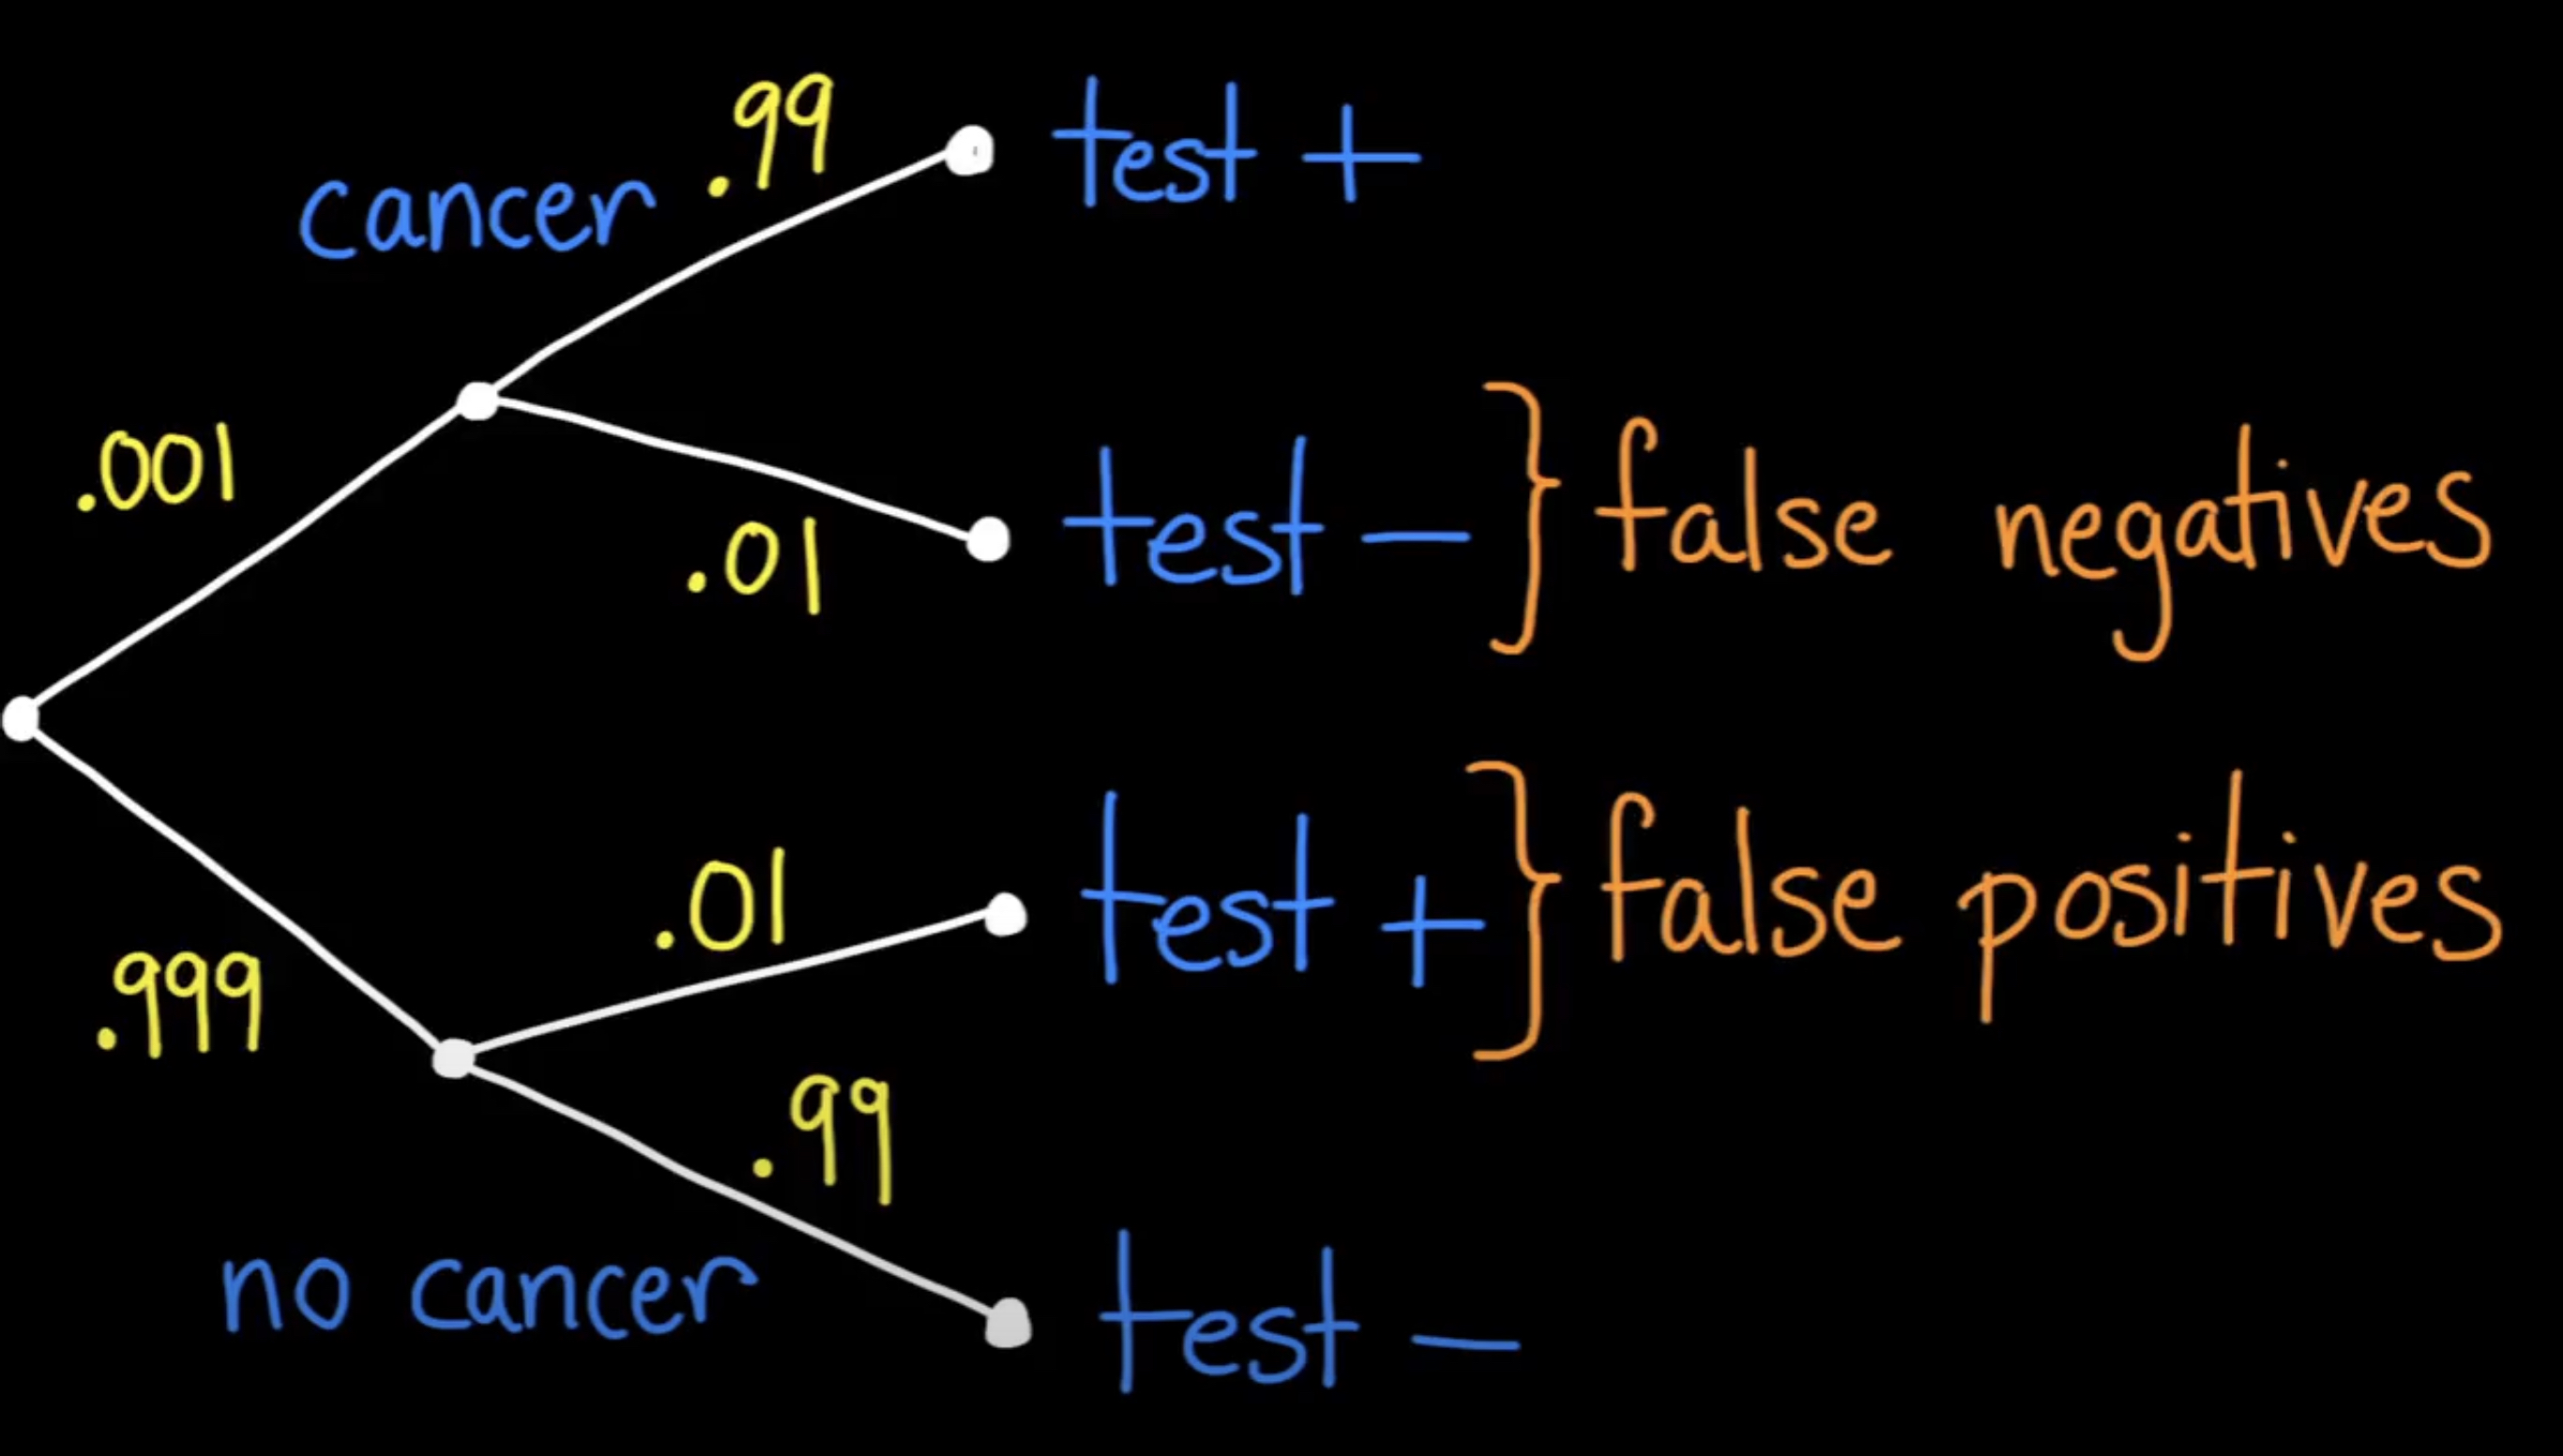

In [5]:
Image(filename = gaussian_img_path + "BedingteWKBaum.jpeg", width=300, height=300)

Wir wollen nun wissen, groß die Wahrscheinlichkeit ist, dass die Person erkrankt ist unter der Bedingung dass der Test positiv ausgefallen ist. Dazu schränken wir unsere Ereignismenge auf die Fälle ein, die diese Bedingung erfüllen:


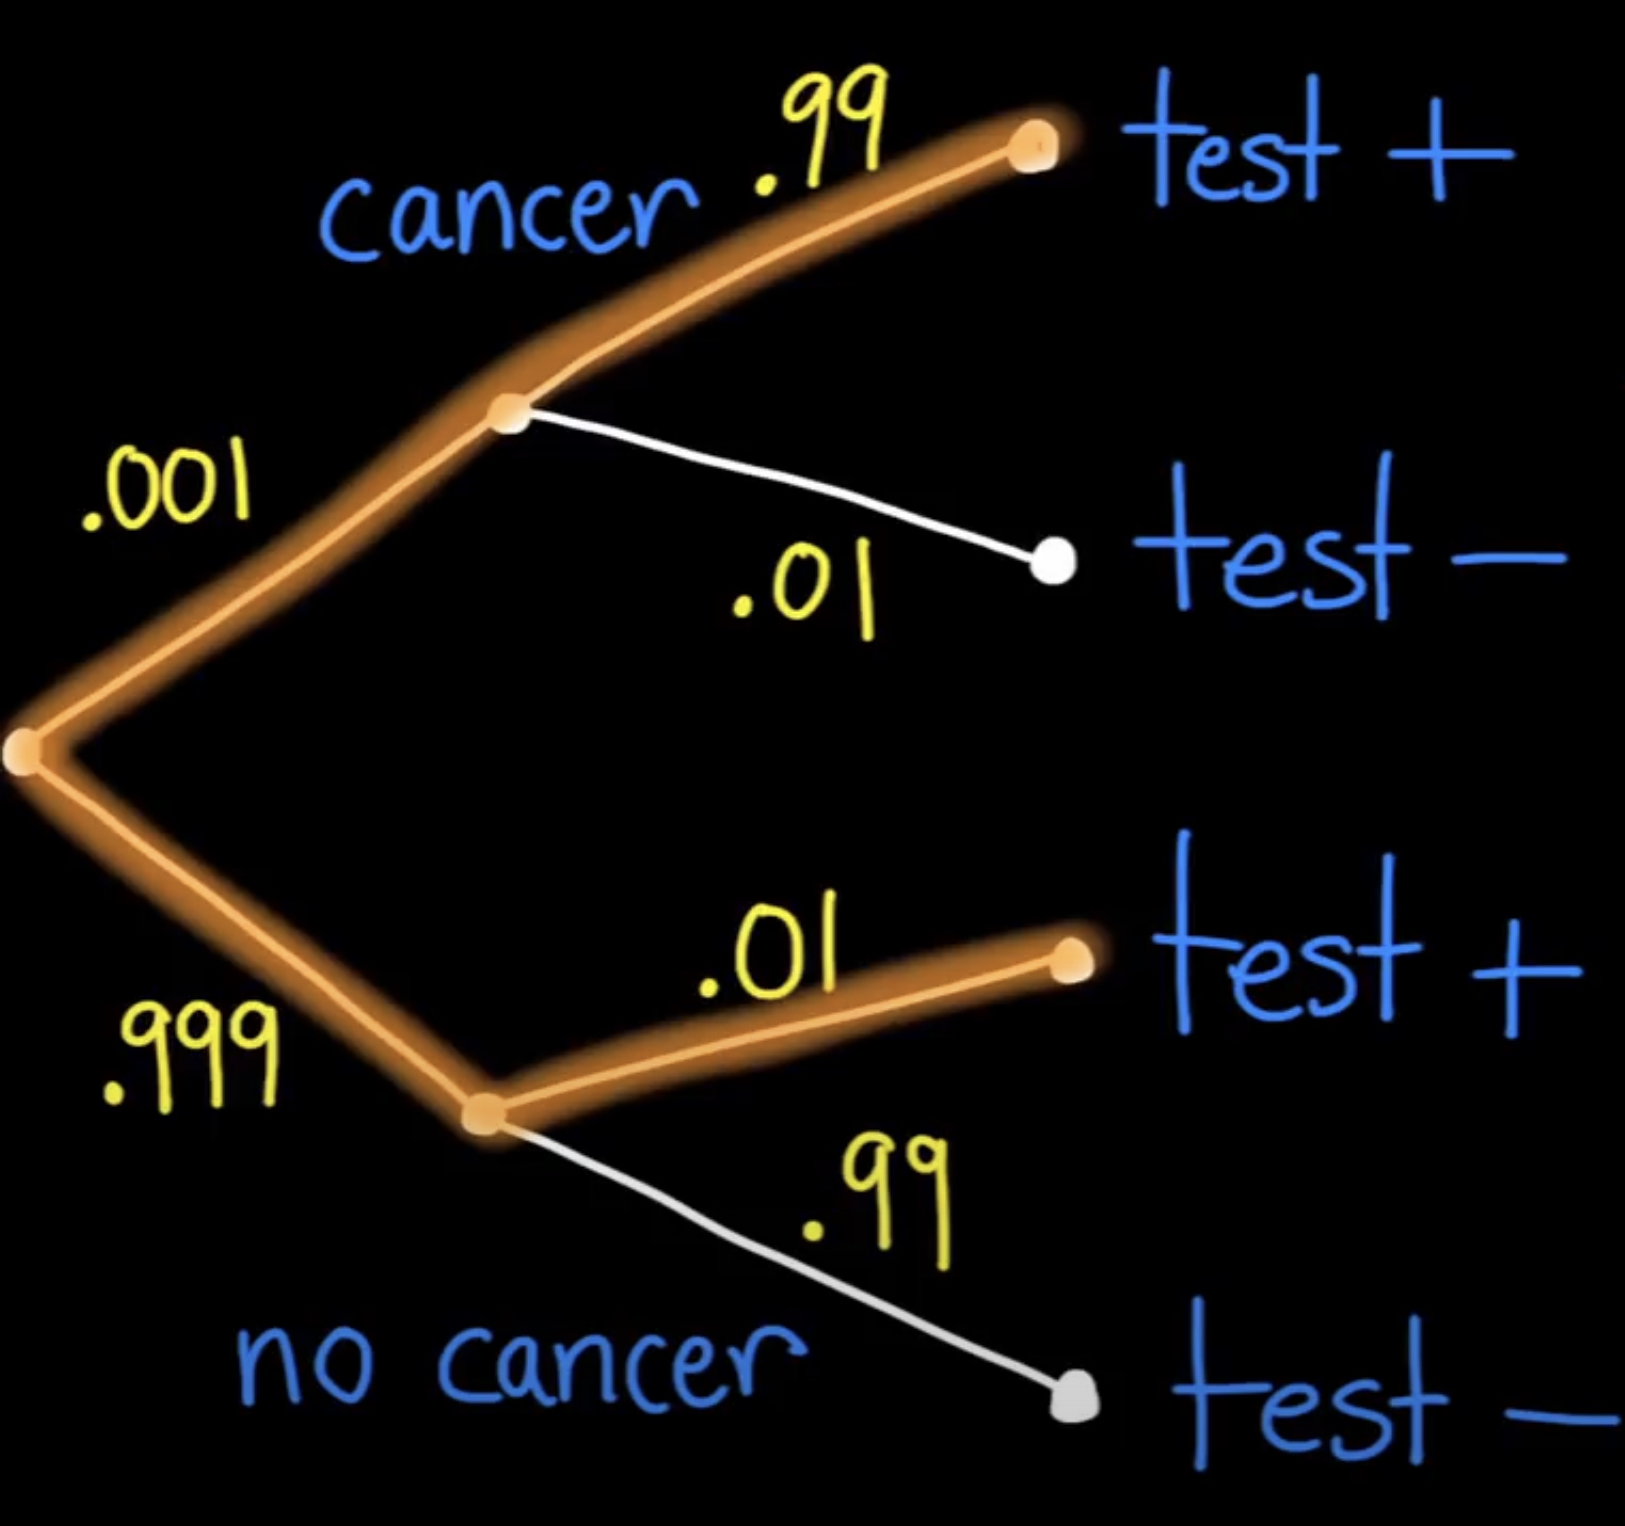

In [6]:
Image(filename = gaussian_img_path + "BedingteWKBaum2.jpeg", width=300, height=300)

Für unsere gesuchte Wahrscheinlichkeit folgt nun

$$P(cancer \vert test+) = \dfrac{0.001 \cdot 0.99}{0.001 \cdot 0.99 + 0.999 \cdot 0.01} \approx 0.09$$

Warum weicht dieser Wert so stark von der Testgenauigkeit ab?

$$\text{Testgenauigkeit} = P(test+ \vert cancer) = 0.99$$

$$\text{WK tatsächlicher Erkrankung} = P(cancer \vert test+) \approx 0.09$$

__Es ist also wichtig zu beachten, dass diese beiden bedingten Wahrscheinlichkeiten im Allgemeinen nicht gleich sind.__

### Bayes Theorem
Nachdem wir uns mit den Grundlagen der bedingten Wahrscheinlichkeiten beschäftigen haben, kommen wir nun zu einer Aussage, die zentral für den späteren Optimierungsalgorithmus ist, das Theorem von Bayes:
$$P(H \vert E) = \dfrac{P(H) \cdot P(E \vert H)}{P(E)}$$
Dabei ist $H$ unsere Hypothese und $E$ unsere Evidenz.
Wir leiten uns das Theorem nun anhand eines Beispiels her und betrachten dazu folgenden Beschreibung einer Person:
> Steve ist sehr schüchtern und zurückgezogen, ausnahmslos hilfsbereit, aber mit sehr wenig Interesse an Menschen oder an der realen Welt. Er ist eine sanftmütige und ordentliche Seele, hat ein Bedürfnis nach Ordnung und Struktur und eine Leidenschaft für Details.

Frage: Ist Steve eher ein Bibliothekar oder ein Farmer? <br><br>
Ohne lange zu überlegen würden die meisten Menschen intuitiv auf Grunde der Beschreibung seiner Persönlichkeit sagen, dass Steve ziemlich sicher ein Bibliothekar ist. Was sie dabei vergessen zu berücksichtigen ist das Mengenverhältnis von Bibliothekaren und Farmern. Nehmen wir als Grundlage das Mengenverhältnis von 1:20 welches auch Kahnemann und Tversky annahmen und betrachten eine repräsentative Stichprobe von 10 Bibliothekaren und 200 Farmern.
Nehmen wir nun weiterhin an, dass wir 40% unserer Bibliothekare und 10% unserer Farmer der obigen Beschreibung entsprechen.
Dann gilt, dass  



$$P(H \vert E) = P(\text{Person ist Bibliothekar gegeben Beschreibung}) \\ = \text{Anteil Bibliothekare unter Personen die Beschreibung erfüllen} = \dfrac{4}{24} \approx 16.7\%$$


Das heißt, selbst wenn es vier mal so wahrscheinlich ist, dass ein Bibliothekar die Beschreibung erfüllt, reicht das nicht aus um die Tatsache zu überwinden,  dass es viel mehr Farmer gibt.
> New evidence should not determine belief, but update prior belief.

Wie bereits oben beschreiben, __neue Evidenz restringiert den Raum möglicher Beobachtungen__:

> 4% Bibliothekare -> Beschreibung -> 16.7% Bibliothekare.

> The posterior is the belief after seeing the evidence.

__Herleitung Bayes Theorem__

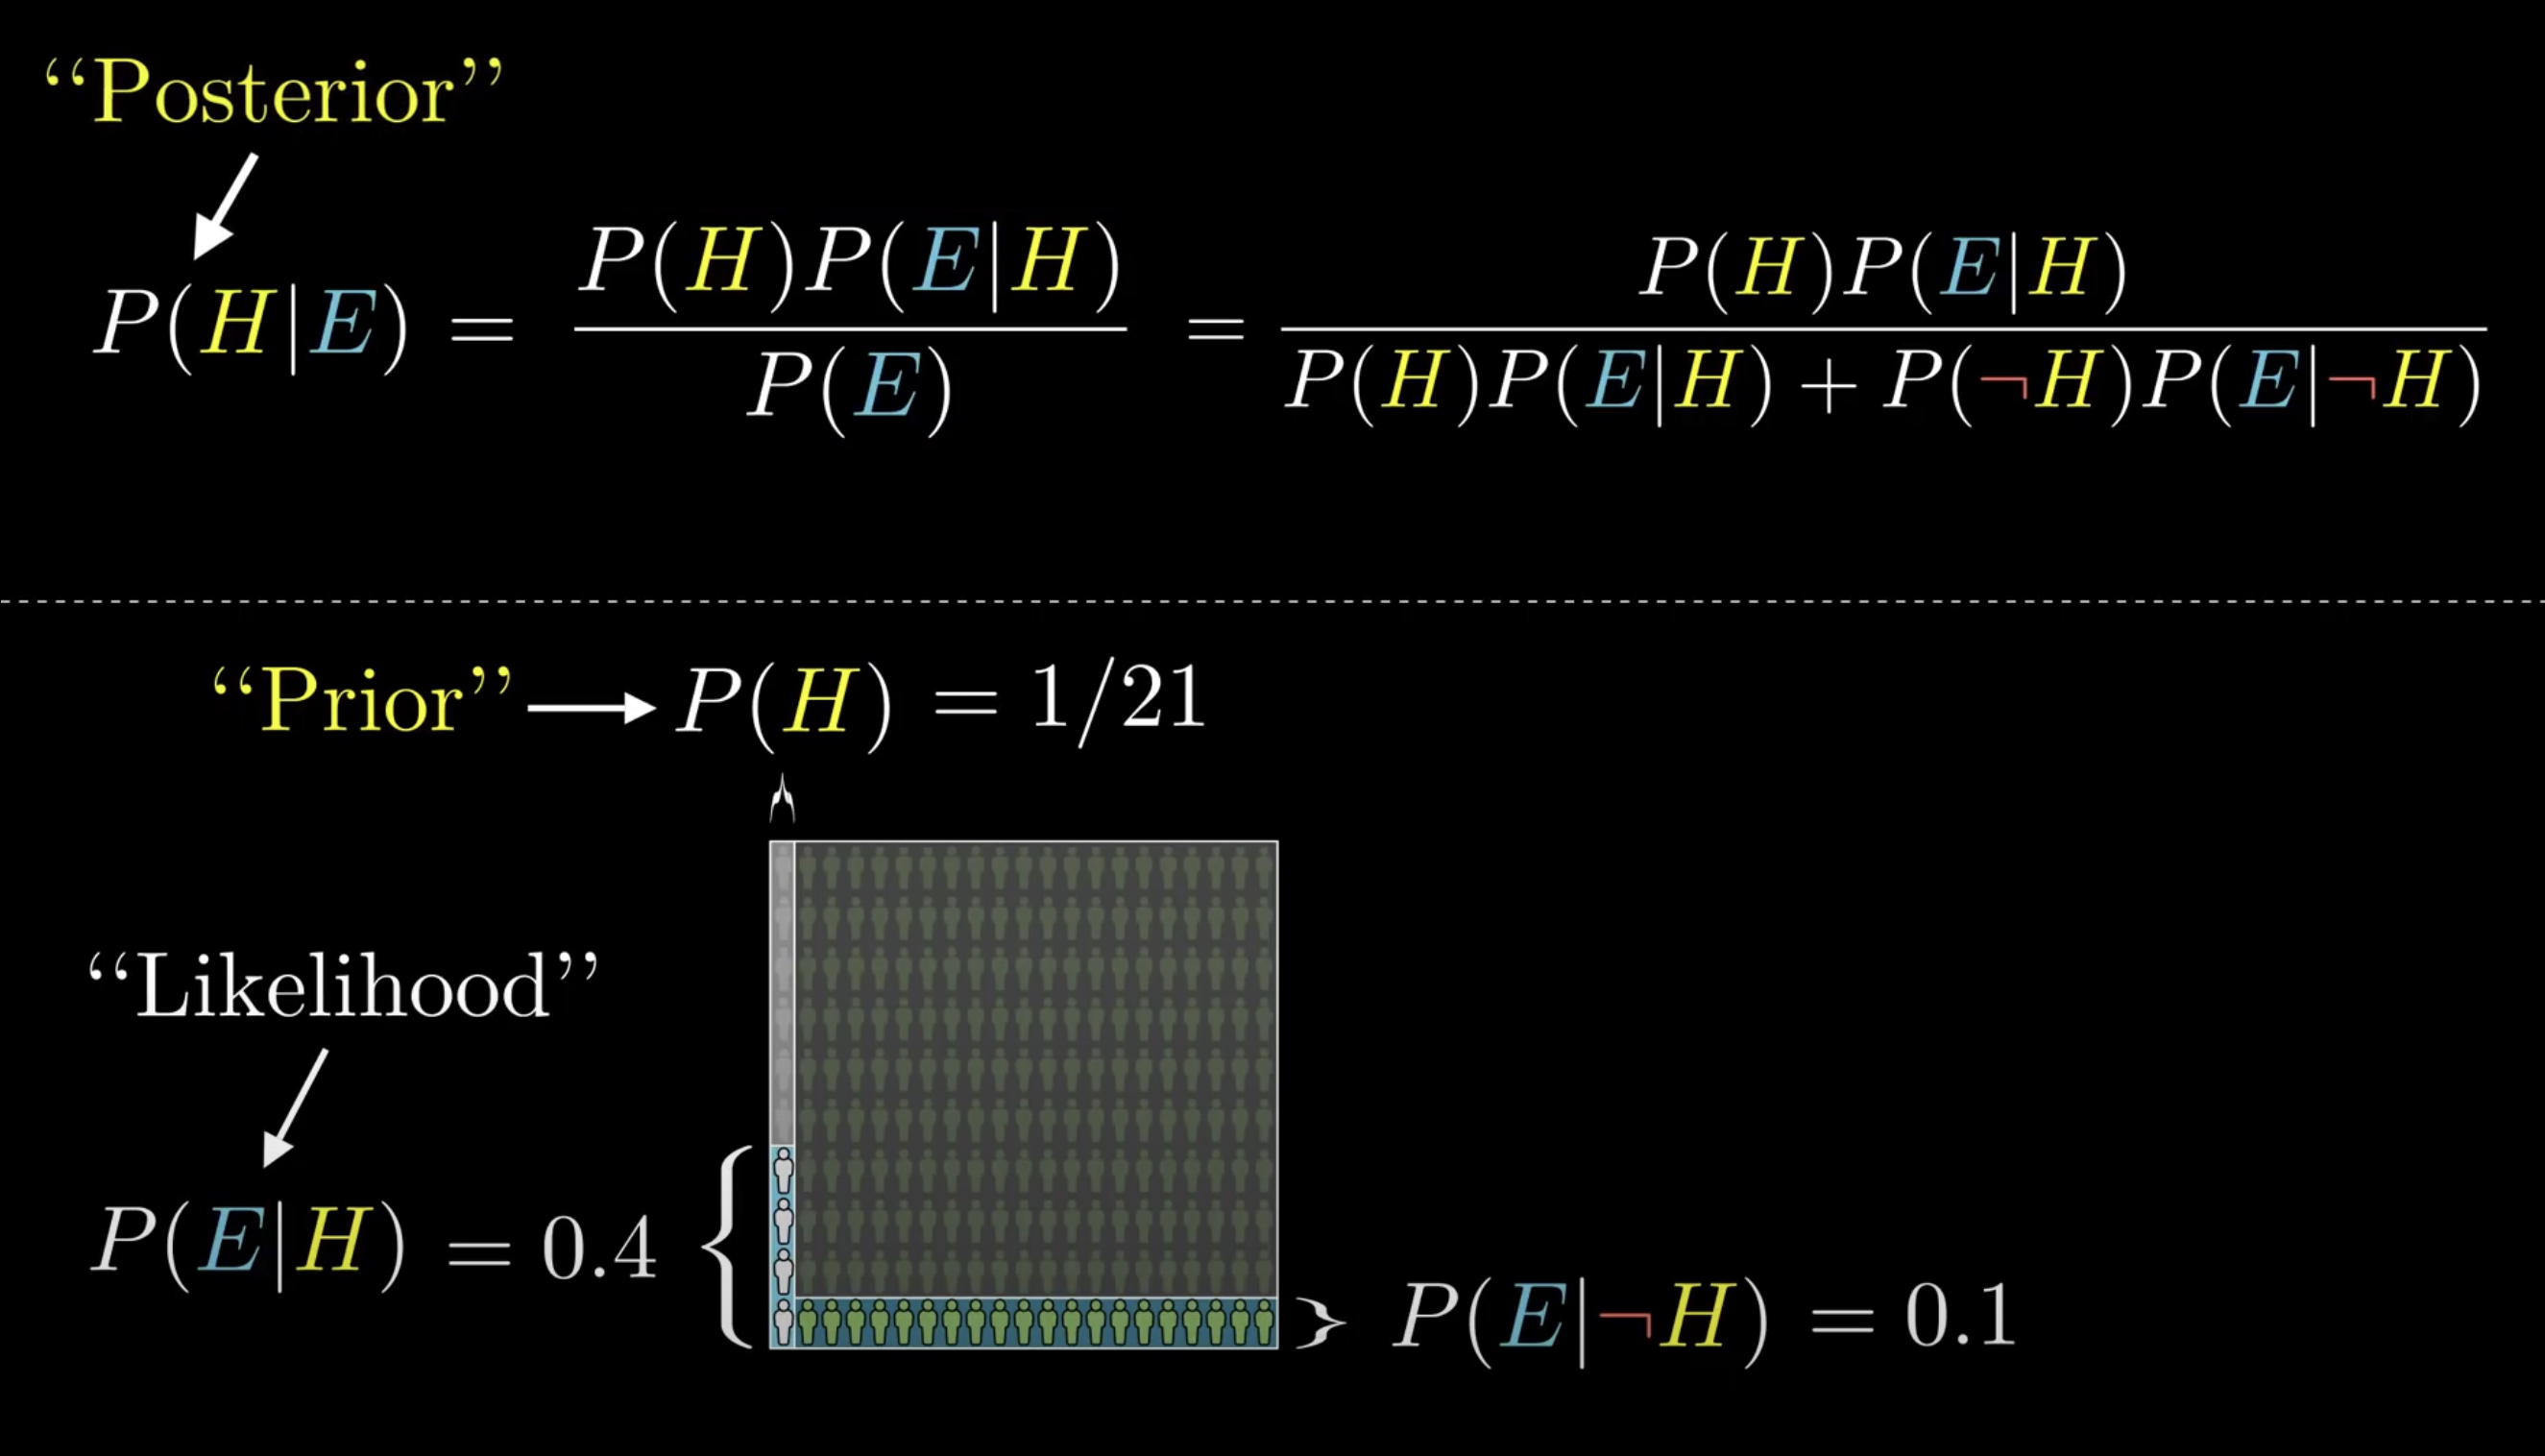

In [7]:
Image(filename = gaussian_img_path + "Bayes.jpeg", width=400, height=400)

1. Prior $$P(H \vert E) = \text{WK der Hypothese gegeben Evidenz}$$

2. Likelihod $$P(E \vert H)= \text{WK der Evidenz, falls die Hypothese zutrifft}$$

$$= P(\text{die Beschreibung trifft zu, falls die Person Bibliothekar ist})$$

3. Posterior $$P(H \vert E) = \dfrac{\#\text{Bibliothekare die Evidenz erfüllen}}{\#\text{Personen die Evidenz erfüllen}}$$ 

$$=\dfrac{\#\text{Personen}\cdot P(H)\cdot P(E \vert H)}{\#\text{Personen}\cdot P(H) \cdot P(E \vert H) + \#\text{Personen}\cdot P(\lnot H) \cdot P(E \vert \lnot H)}$$ 

$$=\dfrac{P(H) \cdot P(E \vert H)}{P(H) \cdot P(E \vert H) + P(\lnot H) \cdot P(E \vert \lnot H)}$$ 

$$=\dfrac{P(H) \cdot P(E \vert H)}{P(E)}$$

## Gauss Prozesse (Gaussian Processes)
Gauss Prozesse sind die Grundlage für die Bayerische Hyperparameter Optimierung, daher ist es wichtig insbesondere diese zu verstehen.


### Herleitung der Gauss Prozesse


#### Motivation 


Wir starten unsere Reise zum Verständnis von Gauss Prozessen bei der nicht-linearen Regression. 
Gegeben sei uns eine Menge von Datenpunkten $(x,y)$ bestehend aus dem Input $x$ und dem Wert $y$. Nun wollen wir für einen neuen Input eine Preditkion / Schätzung für den Wert angeben.

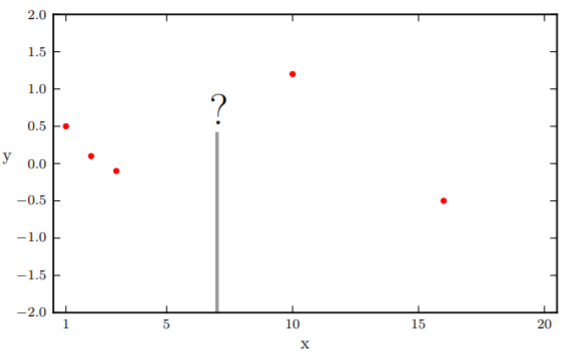

In [8]:
Image(filename = gaussian_img_path + "datapoints.png", width=400, height=400)

Bei der nicht-linearen Regression würden wir nun versuchen ein Polynom zu finden, welches die Natur der Daten bestmöglich abbildet.
Wir erhalten also genau eine Funktion (Best Estimate) die unsere Daten modelliert.


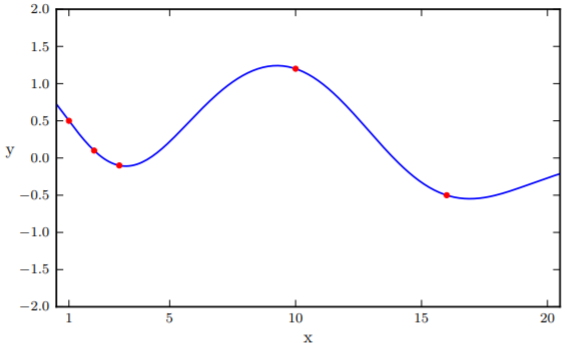

In [9]:
Image(filename = gaussian_img_path + "regression.png", width=400, height=400)

Worauf wir nun abzielen ist eine Menge von Funktionen, die alle das Potenzial besitzen unsere Daten abzubilden, die wir aktualisieren können, wenn wir neue Datenpunkte erhalten.
Dadurch erhalten wir so etwas wie ein Konfidenzintervall an jedem Input $x$, d.h. wie sicher wir uns sind, das unser Best Estimate die Daten hier korrekt abbildet.


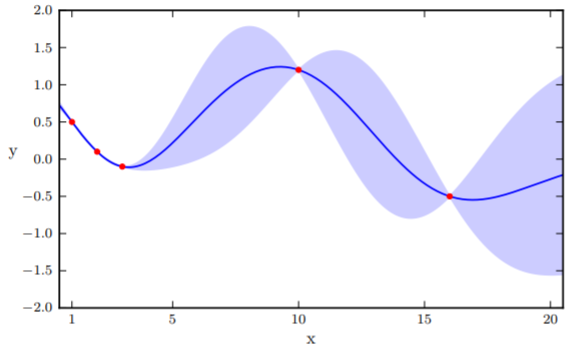

In [10]:
Image(filename = gaussian_img_path + "regression_with_error.png", width=400, height=400)

Um das zu erreichen wenden wir uns im folgenden der Gauss Verteilung zu.

#### Die Welt der Multivariaten Gauss Verteilungen 

Die Eigenschaften von Gauss Verteilungen haben wir uns bereits weiter oben angesehen. Nun betrachten wir eine Verteilung, bei der die Zufallsvariable eine Linearkombination mehrerer Zufallsvariablen ist.
Die formale Definition lautet:


$$X=(X_1,...,X_k)^T$$

hat eine multivariate Gaußsche Verteilung falls für jeden konstanten Vektor $a\in \mathcal{R}^k$ gilt:


$$Y=a_1X_1+a_2X_2+...+a_kX_k$$ ist normalverteilt.


In Worten: Eine Zufallsvariable ist k-variat Gauss verteilt, falls jede Linearkombination ihrer k Komponenten ebenfalls Gauss verteilt ist.

__Anmerkung:__ Die Summe zweier Zufallsvariablen ist nicht das gleiche wie die Summe zweier Verteilungen.


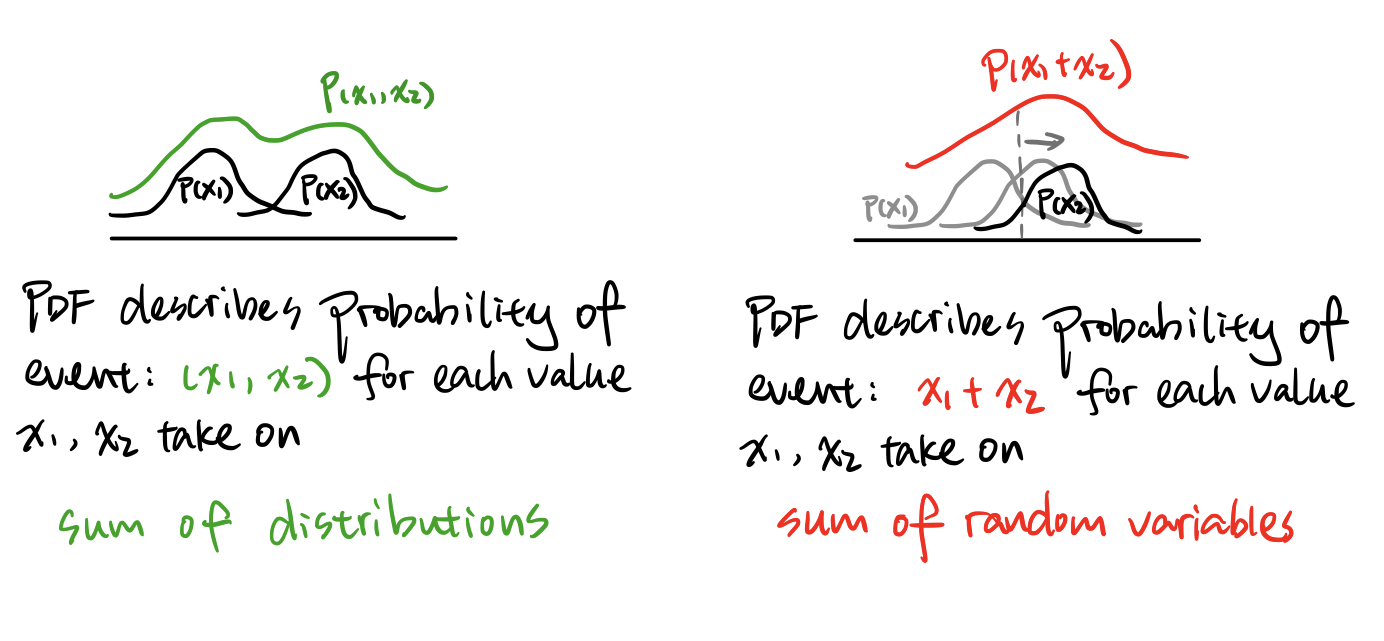

In [11]:
Image(filename = gaussian_img_path + "randomvar_distr.png", width=400, height=400)

Summe von Verteilungen: Wahrscheinlichkeit für das Event $(X_1=x_1, X_2=x_2)$.<br>


Summe von Zufallsvariablen: $\mathcal{P}(x_1+x_2=x)$.

##### Kovarianzmatrix und bedingte Verteilung


Wir betrachten nun zwei wichtige Eigenschaften der Gauss Verteilung beispielhaft im 2 dimensionalen Fall.
Die Eigenschaften der Verteilung sind vollständig bestimmt durch den Mean $\mu$ und die Kovarianzmatrix $\Sigma$. <br>

Die __Kovarianzmatrix__ sagt uns: <br>
1. welche Varianz die einzelnen Zufallsvariablen haben (Diagonaleinträge)
2. Welche Kovarianz zwischen den Zufallsvariablen besteht (Nichtdiagonaleinträge)

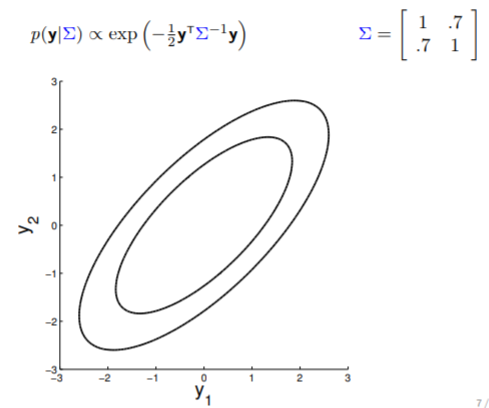

In [12]:
Image(filename = gaussian_img_path + "2dGaussian.png", width=400, height=400)

In diesem Bild sehen wir eine Beispiel für eine 2D Gauss Verteilung. Punkte auf den Ovalen haben alle die gleiche Wahrscheinlichkeit.<br>
Die Kovarianz sagt uns, in welchem Maße die eine Variable uns Informationen über die andere liefert. Nimmt sie den Wert 1 an, sind die beiden Variablen linear abhängig.

Reduzieren wir die Kovarianz, passiert folgendes:

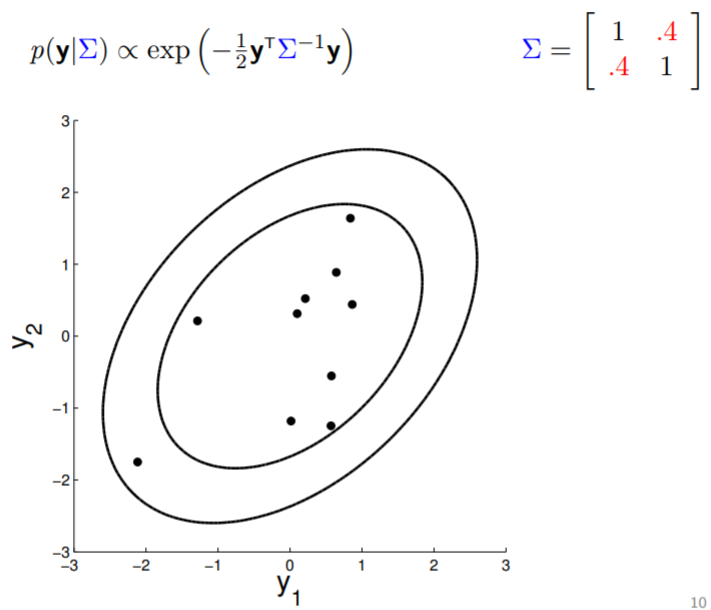

In [13]:
Image(filename = gaussian_img_path + "covariance_reduction1.png", width=300, height=300)

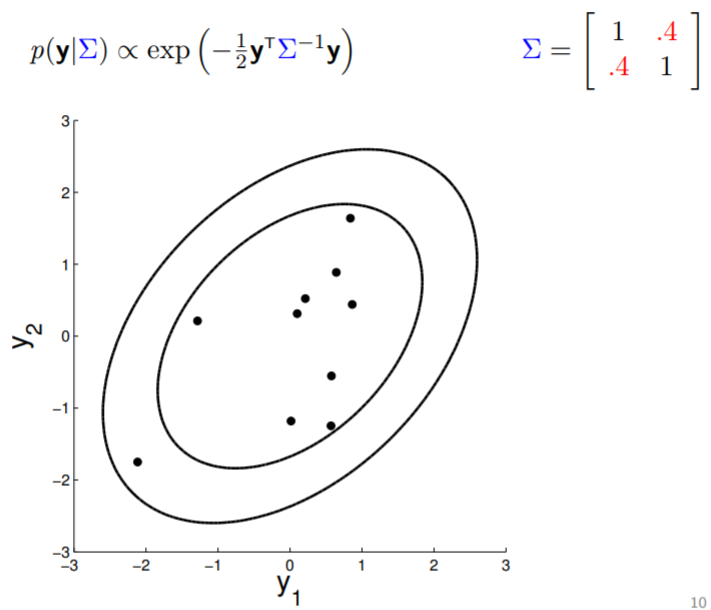

In [14]:
Image(filename = gaussian_img_path + "covariance_reduction2.png", width=300, height=300)

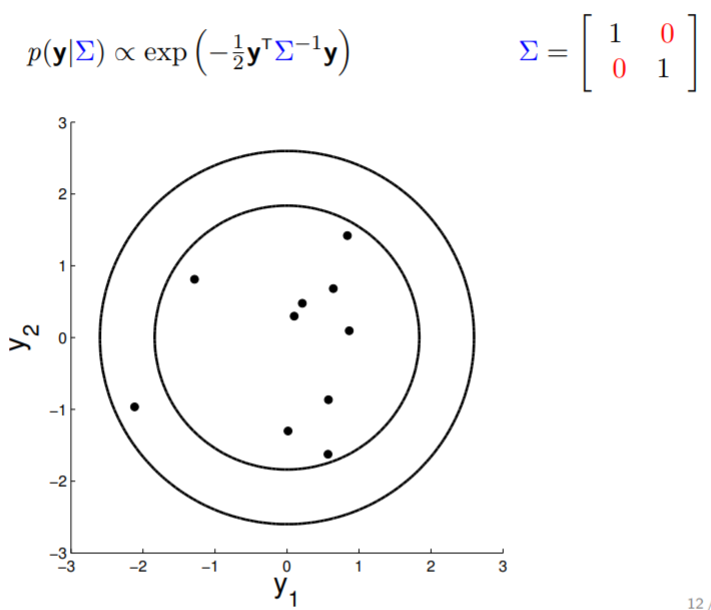

In [15]:
Image(filename = gaussian_img_path + "covariance_reduction3.png", width=300, height=300)

Für __bedingte Verteilungen__ wissen wir bereits, dass wir unseren Ereignisraum auf solche Ereignisse beschränken, welche die gestellte Bedingung erfüllen. 
Das gleich passiert im Fall der multivariaten Verteilung.
Im 2-dimensionalen Fall können wir uns die Verteilung der Zufallsvariable $Y_2$ angucken unter der Bedingung das $y_1=1$ ist.
Grafisch fixieren wir $y_1$ und Berechnen die Wahrscheinlichkeitsdichtefunktion der Zufallsvariable $Y_2$ entlang der vertikalen (roten) Linie.


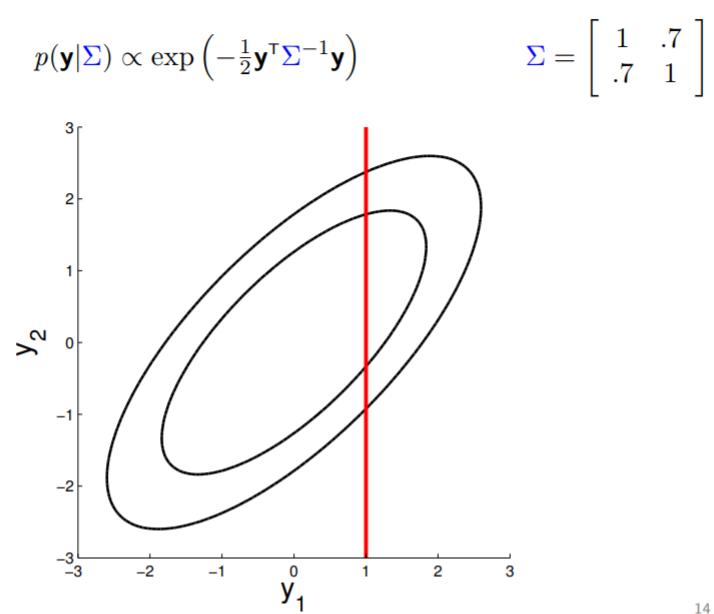

In [16]:
Image(filename = gaussian_img_path + "2D_condition.png", width=300, height=300)

Die bedingte Verteilung ist wieder eine Normalverteilung:

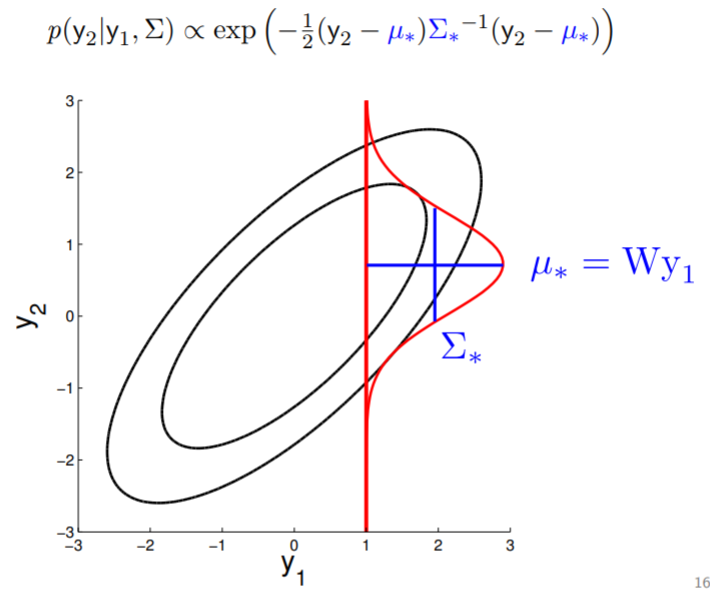

In [17]:
Image(filename = gaussian_img_path + "2D_condition_distr.png", width=300, height=300)

_Welche Auswirkung hat die Kovarianz auf die bedingte Verteilung?_<br>

Eine hohe Kovarianz sagt uns, dass der Outcome der einen Zufallsvariable uns viele Informationen über den möglichen Outcome der anderen liefert. Das heißt der bedingte Ereignisraum ist kleiner, die Varianz der möglichen Ereignisse also geringer. Resultierend ist die Gaussglocke spitzer.<br>
Analog ist sie für geringere Kovarainz breiter. Sind die Variablen vollständig unabhängig, ist die bedingte Verteilung einfach die Verteilung der Variablen selbst. <br>

<img src="./Grafiken/2d_condition_corr_drop.gif" width="500" align="center">

##### Höherdimensionale Gaussverteilungen

Bevor wir uns nun Gaussverteilungen höherer Dimension anschauen, führen wir nun eine Notation und Visualisierung ein, die uns hilft, die Korrelation der Zufallsvariablen im Sampling Prozess besser zu verstehen.

Wir tragen den Index jeder Zufallsvariable aus der Multivariaten auf der X-Achse auf.
Anschließend ziehen wir ein Sampling aus der multivaraiten Verteilung. <br>
Für jedes Sampling aus der Verteilung tragen wir zu jedem der Indizes den gezogenen Wert der entsprechenden Verteilung auf und interpolieren zwischen den Punkten.

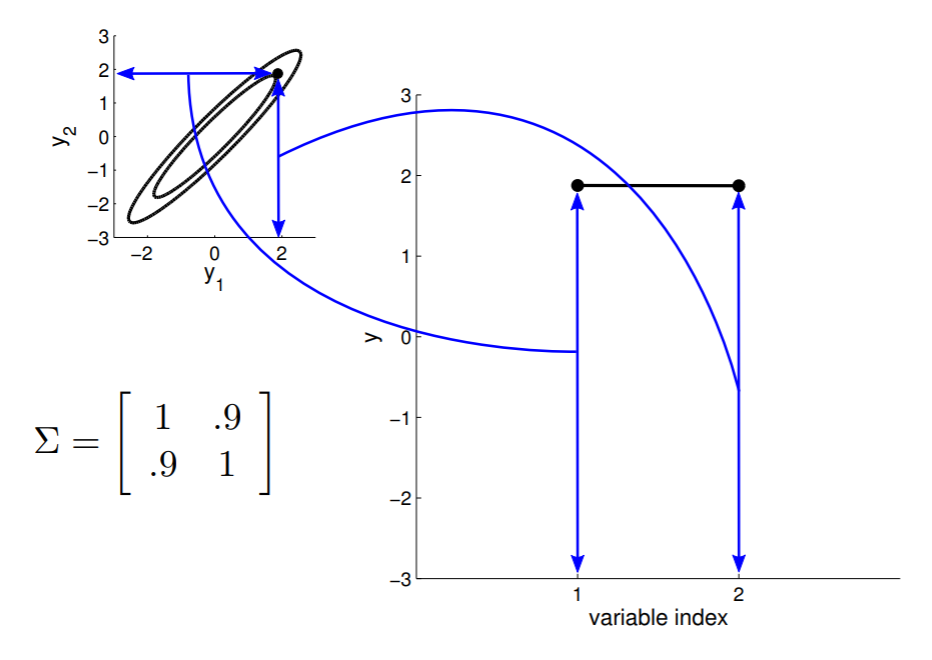

In [18]:
Image(filename = gaussian_img_path + "corr_vis.png", width=300, height=300)

Ziehen wir nun hintereinander Punktpaare $(y_1, y_2)$ der Verteilung und plotten diese Nacheinader als Interpolation, dann erhalten wir eine Gerade, bei der sich die beiden Endpunkte gemeinsam auf und ab bewegen. 
Das bedeutet, dass die beiden Zufallsvariablen immer ähnliche Werte annehmen und ist darin begründet, dass sie in diesem Beispiel eine sehr hohe Korrelation von $0.9$ haben (sowie $\sigma$=1 und $\mu$=0).

<img src="./Grafiken/corr_vis.gif" width="500" align="center">

Wir können uns mit dieser Visualisierung auch das Verhalten der bedingten Verteilung ansehen.
Wir erinnern uns, dass bedingte Verteilung heißt, dass wir eine Bedingung an unsere multivariate Verteilung stellen indem wir einen Wert fixieren. Wir setzen im folgenden Beispiel $y_1 = 1$.

<img src="./Grafiken/cond_corr_vis.gif" width="500" align="center">

Auf Grund der hohen Korrelation der beiden Zufallsvariablen, schwankt der Wert von $y_2$ nur wenig, wenn wir $y_1$ fixieren.

###### 5D Gauss Verteilung
Mit Hilfe dieser Visualsierung wollen wir uns dieses Verhalten nun für Gauss Verteilungen höherer Dimensionen anschauen.

Gegeben sei uns nun eine Verteilung welche aus 5 Zufallsvariablen besteht und die dazugehörige 5x5 Korrelationsmatrix.
Beachte dass letztere für dieses Beispiel völlig willkürlich gewählt ist! <br>
Wenn wir uns die Korrelationsmatrxi näher anschauen, dann können wir zwei Eigenschaften erkennen
1. Zufallsvariablen deren Index nah beieinander liegt haben hohe Korrelation und  Zufallsvariablen deren Index weit auseinader liegt niedrige. D.h. der Punkt ganz links liefert uns viele Informationen über den Wertebereich seines Nachbarn, aber wenige für den Wert $y_5$.
2. Alle Zufallsvariablen haben Varainz 1 (Diagonaleinträge)

Wir können nun ein Sampling aus der Verteilung ziehen und wie zuvor im 2-dimensionalen Fall die Werte der einzelnen Zufallsvariablen plotten und interpolieren.

<img src="./Grafiken/5D_gaussian_sampling.gif" width="500" align="center">

Jede der hintereinader geplotteten Kurven entspricht dabei einem Sample der Verteilung, als einem Vektor $(y_1, ..., y_5)$.
Oben links sehen wir immer das Wertepaar $(y_1. y_5)$ exemplarisch aufgetragen.

Hier können wir noch nicht besonders viel erkennen, spannend wird jedoch wenn wir uns nun das Verhalten der bedingten Verteilung für die Bedingung $y_1=1$ angucken.

<img src="./Grafiken/5D_gaussian_cond_sampling.gif" width="500" align="center">

Jede geplottete Kurve entspricht einem Vektor $(1, y_2, y_3, y_4, y_5)$ gezogen aus der bedingten Verteilung.

_Was können wir nun beobachten?_ <br>
Wir sehen dass die Werte für steigenden Index stärker schwanken. Das können wir uns erneut mit der Korrelationsmatrix erklären. Die höhe Korrelation zwischen $y_1$ und $y_2$ schränkt den Wertebereich für $y_2$ in der bedingten Verteilung wesentlich stärker ein als die geringe Korrelation zwischen $y_1$ und $y_5$ für $y_5$.

##### 20D Gauss Verteilung

An diesem Punkte führen wir erneut eine vereinfachende und intuitivere Visualisierung ein, dieses mal für die Korrelationsmatrix. Anstatt der numerischen Matrix betrachten wir fortan die Korrelationsmatrix als Heatmap, wobei rote Bereiche hohe Korrelation und blaue Bereiche niedrige Korrelation bedeuten:

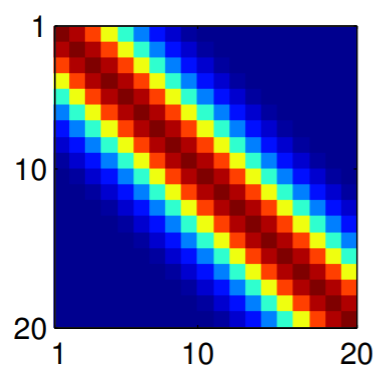

In [19]:
Image(filename = gaussian_img_path + "korrelationsmatrix_heatmap.png", width=300, height=300)

Aus unserer 20-dimsenionalen Gauss Verteilung können wir nun wieder Sample in Form 20-dim Vektoren ziehen und diese interpoliert als Kurve plotten. Unsere Sample sehen dann aus wie folgt:

<img src="./Grafiken/20d_gaussian_sampling.gif" width="500" align="center">

Nun können wir uns angucken wie die Kurven aussehen, wenn wir die Werte für $y_1$ und $y_2$ fixieren und aus der resultierenden bedingten Verteilung samplen:

<img src="./Grafiken/20d_gaussian_cond_sampling.gif" width="500" align="center">

Das Ergebnis erinnert nun schon ein wenig an das ursprüngliche Problem der nichtlinearen Regression mit dem wir gestartet sind.

_Was passiert nun hier?_ <a id='GaussianProcess'></a>

Durch unsere Korrelationsmatrix definieren wir eine Menge von Zufallsvariablen, wobei aus jeder jeweils 1 Wert gezogen wird. Dadurch entstehen Wertepaare die wir als Punkte auftragen. Durch Interpolation erhalten wir Kurven. Die Korrelationen unterstellen den Zufallsvariablen und somit den Punkten ein Maß an Abhängigkeit, in diesem Fall in der Art, dass benachbarte Punkte ähnlicher sind als weit entfernte. 
Was dadurch entsteht ist eine Menge (oder auch Familie) von Kurven, die wir durch Sampling aus unserer multivariaten Gaussverteilung generieren können. 
Die ungefähre Form dieser Kurven ist durch die Korrelationen vorgegeben. Stichproben aus dieser Familie plotten wie in der oberen Grafik.

Fixieren wir nun die ersten beiden Werte, erhalten wir für den Rest der Zufallsvariablen bedingte Verteilungen.
Auf Grund der Eigenschaften der hier gewählten Korrelationsmatrix liefern uns diese beiden Punkte viele Informationen über Punkte die ihnen nahe sind, diese Schwanken beim Ziehen aus der bedingten Verteilung als weniger. Dagegen erhalten wir weniger Informationen über weit entfernte Punkte, dort ist als die Unsicherheit größer und die Punkte schwanken mehr.

Für die Familie der Kurven der bedingten Verteilung können wir nun den Mittelwert $\mu$ und die Standardabweichung $\Sigma$ anbalytisch bestimmen, da die bedingte Verteilung erneut eine Gauss Verteilung ist.

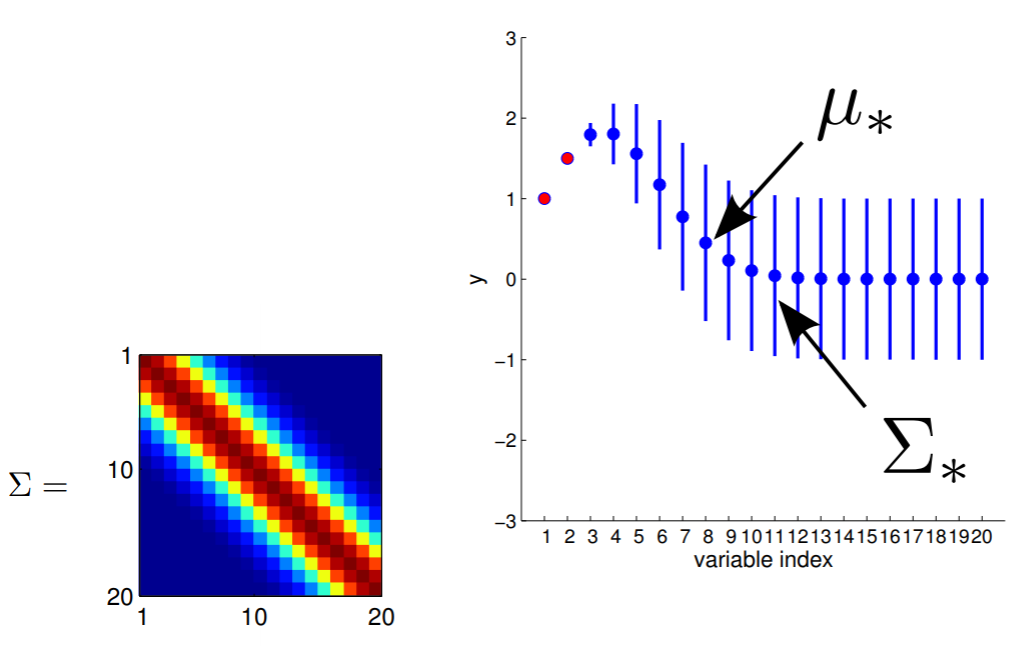

In [20]:
Image(filename = gaussian_img_path + "20d_gaussian_sampling_mean.png", width=500, height=500)

Wie beschrieben steigt die Standardabweichung / Unsicherheit mit größerer Distanz zu den bekannten / fixierten Punkten.

Spannender und sehr viel ähnlicher zu unserem Regressionsproblem ist der Fall in dem wir nicht nur Punkte ganz links, sondern auch in der Mitte.


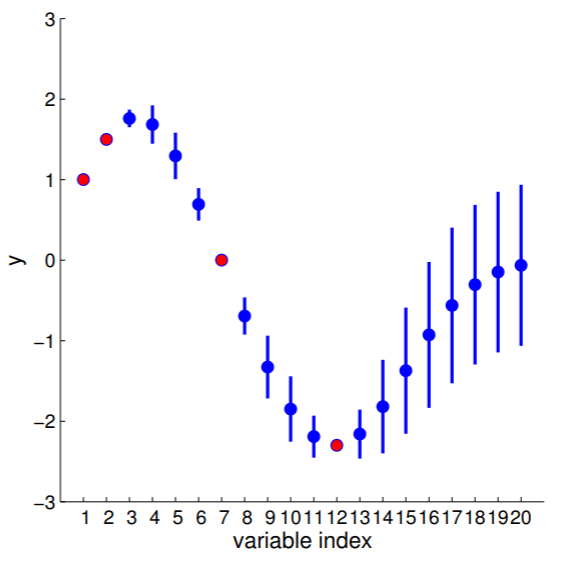

In [21]:
Image(filename = gaussian_img_path + "20d_gaussian_regression.png", width=500, height=500)

Nehmen wir an wir hätten diese Punkte tatsächlich beobachtet. Dann ist der Prozess den wir hier beschrieben haben das generieren einer Familie von Funktionen, deren ungefähre Form durch die Korrelationsmatrix beschrieben wird, wobei alle Funktionen durch die Beobachtungen laufen.
Die Verteilung der einzelnen Punkte ist normal / gausssch.

##### Integer -> Reell

Bisher haben wir auf der X-Achse nur ganzzahlige Werte betrachtet, da diese ursprünglich durch die Indizes der einzelnen Zufallsvariablen aus der multivariaten Verteilung motiviert waren.
Für eine Regression ist das natürlich nicht ausreichend, wir benötigen eine reellwertige X-Achse. <br>
Zum Glück in dieser Schritt nicht schwer zu vollziehen, denn typischerweise gibt es eine Funktion, welche die Werte der Korrelationsmatrix erzeugt / berechnet. Prinzipiell bildet eine solche Funktion aber alle Werte aus $\mathbb{R}$ ab und nicht nur ganzzahlige Werte. Die Kovarianzfunktion bezeichnen wir fortan als Kernel Funktion.

Die Werte in der Kovarianzmatrix in den obigen Beispielen wurden mit der _Radial Basis Function_ oder __RBF-Kernel__ $K(x_1,x_2)$ erstellt, wobei 

$$K(x_1,x_2)=\sigma^2 e^{\frac{1}{2l^2}(x_1-x_2)^2}$$

Oft unterstellt man den Trainingsdaten ein gewisses Rauschen, dieses lässt sich mit einem Störfaktor modellieren. Die Kovarainzmatrix ist dann definiert wie folgt:

$$\Sigma (x_1, x_2) = K(x_1, x_2) + I \sigma_y^2$$ <a id='Sigma_from_kernel'></a>

wobei

$$K(x_1, x_2) = \sigma^2 e^{-\frac{1}{2l^2}(x_1 - x_2)^2}$$

Das bedeuetet nun, dass wir die Kovarianz nun für zwei beliebige reelle Zahlen berechnen können. Das resultat ist eine unendlich-dimensionale Gaussverteilung definiert durch die Kernelfunktion.

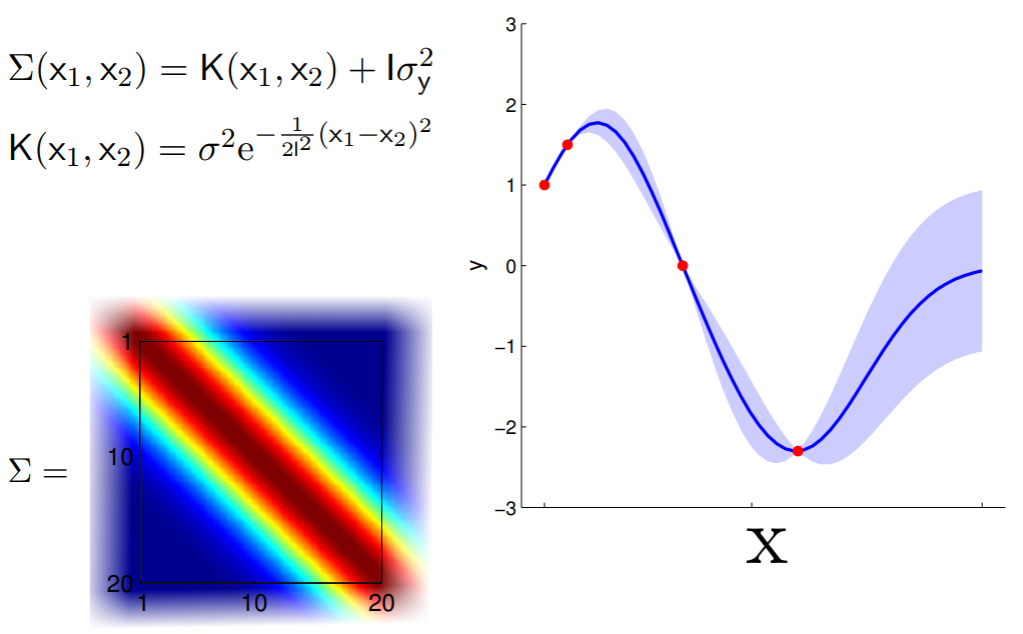

In [22]:
Image(filename = gaussian_img_path + "gaussian_process.png", width=500, height=500)

Im Endeffekt ist genau das nun unser _Gauss Prozess_!

_Wie ist das nun zu verstehen?_

Die Funktionweise des Gauss Prozesses ist bereits [hier](#GaussianProcess) beschrieben.
Was wir seitdem gemacht haben, ist unsere diskrete x-Achse in eine reellwertige zu übertragen. 
Der Gauss Prozess beschreibt also eine Familie von reellwertigen Funktionen / Kurven aus der wir Stichproben ziehen können. Die ungefähre Struktur dieser Kurven ist gegeben durch die Kernelfunktion. 
Fixieren wir den Wert für manche Stellen $x_i$, $i\in I$ (Indexmenge), dann erhalten wir eine bedingte Verteilung, d.h. wir beschränken unsere Familie von Kurven auf solche, die durch unsere Punkte $x_i$ laufen.

##### Mathematische Definition

Der Vollständigkeit halber wollen wir uns natürlich auch die Definition aus dem Lehrbuch ansehen:

> __Ein Gaußprozess (nach Carl Friedrich Gauß) ist in der Wahrscheinlichkeitstheorie ein stochastischer Prozess, bei dem jede endliche Teilmenge von Zufallsvariablen mehrdimensional gaußverteilt ist.__ Verallgemeinert stellt ein Gaußprozess zeitliche, räumliche oder beliebige andere Funktionen dar, deren Funktionswerte aufgrund unvollständiger Information nur mit bestimmten Unsicherheiten und Wahrscheinlichkeiten modelliert werden können. Konstruiert wird er aus Funktionen der Erwartungswerte, Varianzen und Kovarianzen und beschreibt damit die Funktionswerte als ein Kontinuum aus korrelierten Zufallsvariablen in Form einer unendlichdimensionalen Normalverteilung. Ein Gaußprozess ist somit eine Wahrscheinlichkeitsverteilung von Funktionen. Eine Stichprobe daraus ergibt eine zufällige Funktion mit bestimmten bevorzugten Eigenschaften. 

Analog zur Gauss-Verteilung, welche vollständig durch Mittelwert und Varianz definiert ist, ist der Gauss Prozess vollständig definiert durch 
1. die Mittelwert-Funktion $m(x)$
2. die Kovarianz- oder Kernel-Funktion $K(x,\hat{x})$

wobei der Mittlerwert beleiebig sein kann und die Kovarainzmatrix positiv-definit sein muss.

Es gilt also $$f(x) \sim \mathcal{G}\mathcal{P}(m(x), K(x, \hat{x}))$$

Die Frage die sich an diesem Punkt vielleicht stellt ist, wie funktioniert das ganze denn jetzt mit einer unendlichen Anzahl an Parametern. 
Natürlich können wir in endlichem Speicher keine unendlich großen Matrizen speichern, stattdessen haben wir nun eine Kernel-Funktion, die uns jeden beliebigen [Matrixeintrag generieren](#Sigma_from_kernel) kann.

Für unseren Gauss Prozess ist also jedem Punkt $x$ aus unserem Inputraum $X$ eine Zufallsvariable $f(x)$ zugewiesen, wobei gemeinsame Verteilung $p(f(x_1),…,f(x_N)$ als endliche Teilmenge nach Definition des GP ebenfalls Gauss verteilt ist: $$p(f \lvert X) = \mathcal{N}(f \lvert \mu, K)$$
wobei $f=(f(x_1),...,f(x_N))$, $\mu=(m(x_1),...,m(x_N))$ und $K_ij=\kappa(x_i,x_j))$ mit einer von uns gewählten Kernelfunktion $\kappa$.

Gegeben seien uns nun Trainingsdaten mit rauschfreien Funktionswerten

##### Gauss Prozess vs. Nicht-lineare Regression

Gauss-Prozesse sind sogenannte nicht-parametrische (= unendliche viele Parameter) Modelle. Die klassiche nicht-lineare Regressuin verwendet im Gegensatz dazu parametrische Modelle. 

Ein parametrisches Modell ist ein solches, bei dem wir eine bestimmte Menge von Parametern haben, die wir so wählen, dass unser Modell die Daten bestmöglich beschhreibt. Ein beispiel wäre eine lineare Regression:
$$f(x) = ax + b$$
mit den Parametern $\theta=(a,b)$.

Wir können einen Gauß-Prozess-Prior über die nichtlineare Funktion legen - das heißt, wir nehmen an, dass die obige parametrische Funktion aus dem wie folgt definierten Gauß-Prozess gezogen wird:

$$p(f(x)\mid \theta) = \mathcal{G}\mathcal{P}(0, K(x, x'))$$

Als Kernel-Funktion können wir z.B. den RBF-Kernel wählen oder eine  Linear-Kernel, je nachdem, welche Struktur wir den Daten unterstellen.

Mit dem Gauss-Prozess können wir nun Funktionen samplen, die möglicherweise unsere Daten beschreiben. Dabei sollte die Kurve der parametrischen Funktion (theoretisch) in dieser Familie von Funktionen enthalten sein. 
Was wir damit erhalten, ist eine nicht-lineare Regression mit Unsicherheit:

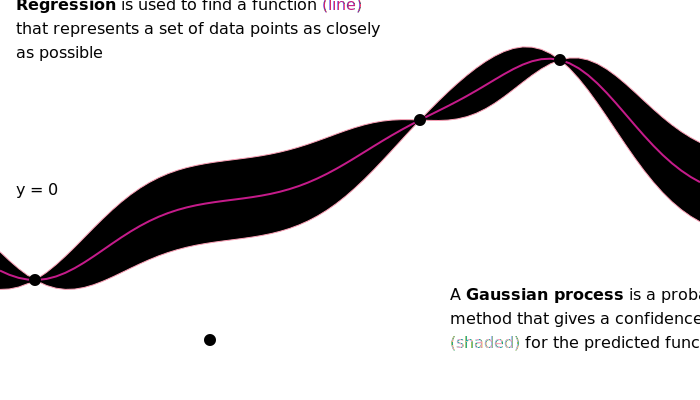

In [23]:
SVG(filename='Grafiken/graph.svg')

Beobachten wir neue Punkte, das heißt wir erhalten neue Trainingspunkte, erhalten wir eine neue A-Posteori Verteilung, bedingt durch die neuen Datenpunkte:

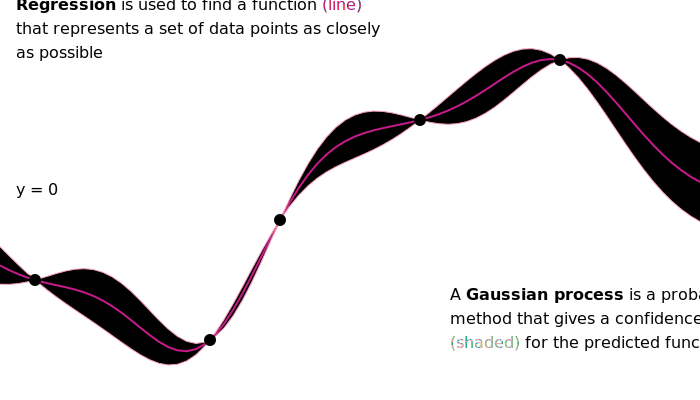

In [24]:
SVG(filename='Grafiken/graph_updated.svg')

Dieses Beispiel ist als interaktive Grafik hier https://distill.pub/2019/visual-exploration-gaussian-processes/ zu finden.

##### Hyperparameter des Gauss-Prozesses

Die Anzahl der Parameter hängt von der jeweiligen Kernel-Funktion ab. <br>
Der oben betrachtete Gauss-Prozess mit RBF-Kernel hat zwei Hyperparameter:
1. den vertikalen Skalierungsfaktor $\sigma$: beschreibt die vertikale Spannweite der Funktion
2. beschreibt, wie schnell die Korrelation zwischen zwei Punkten abnimmt, wenn der Abstand zwischen ihnen zunimmt - ein hoher Wert ergibt eine "glatten" Funktion, während ein niedriger Wert zu einer "wackeligen" Funktion führt

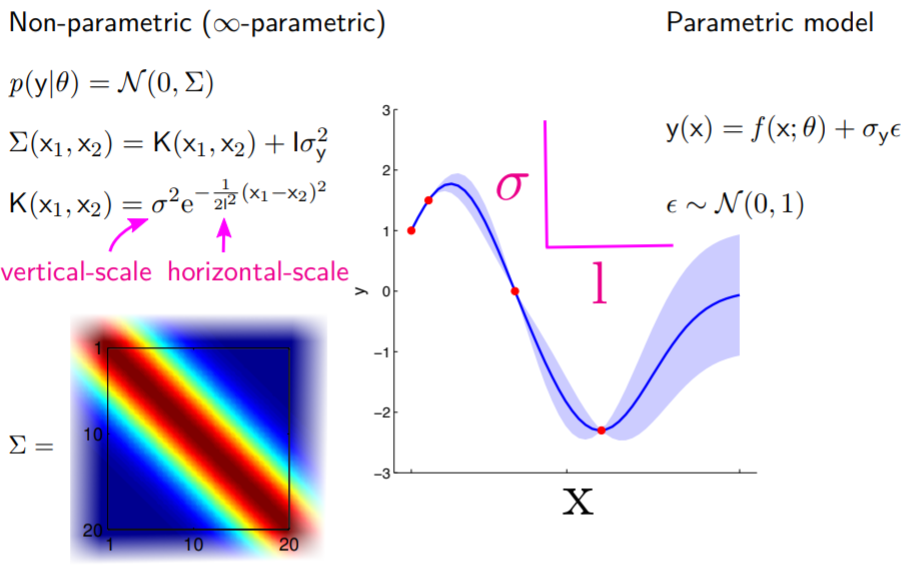

In [25]:
Image(filename = gaussian_img_path + "rbf_hyperparameter.png", width=500, height=500)

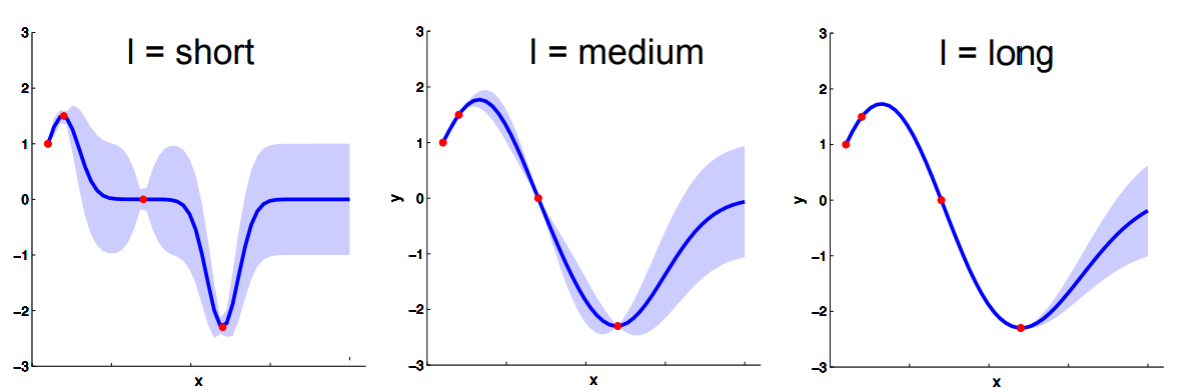

In [26]:
Image(filename = gaussian_img_path + "rbf_hor_scale.png", width=500, height=500)

Glücklicherweise können wir Gauss-Verteilungen die Likelihood in geschlossener Form berechnen. Das heißt, wir können einfach die Wahrscheinlichkeit $p(y\vert \theta)$ unter diesen Hyperparametern mit einem Gradientenoptimierer maximieren:
$$arg\max_{l,\sigma^2}\log p(y\vert\theta)$$

Den Gradienten bzgl. der Hyperparameter erhalten wir analog zur Maximum Likelihood-Methode für Mittelwert und Varainz: https://stats.stackexchange.com/questions/351549/maximum-likelihood-estimators-multivariate-gaussian

#### Die Kernel-Funktion

Das Potential und die Variabilität der Gauss Prozesse liegt in den Kernel-Funktionen. Wie bereits erklärt, definiert diese Funktion die Kovarainz zwischen je zwei Punkten und bestimmt somit die Charakteristik der Kurven des Gauss Prozesses. <br>
Bisher haben wir uns nur den RBF-Kernel angesehen. Um ein besseres Verständnis für die Funktion des Kernels zu bekommen, betrachten im Folgenden zusätzlich einen linearen und einen periodischen Kernel.

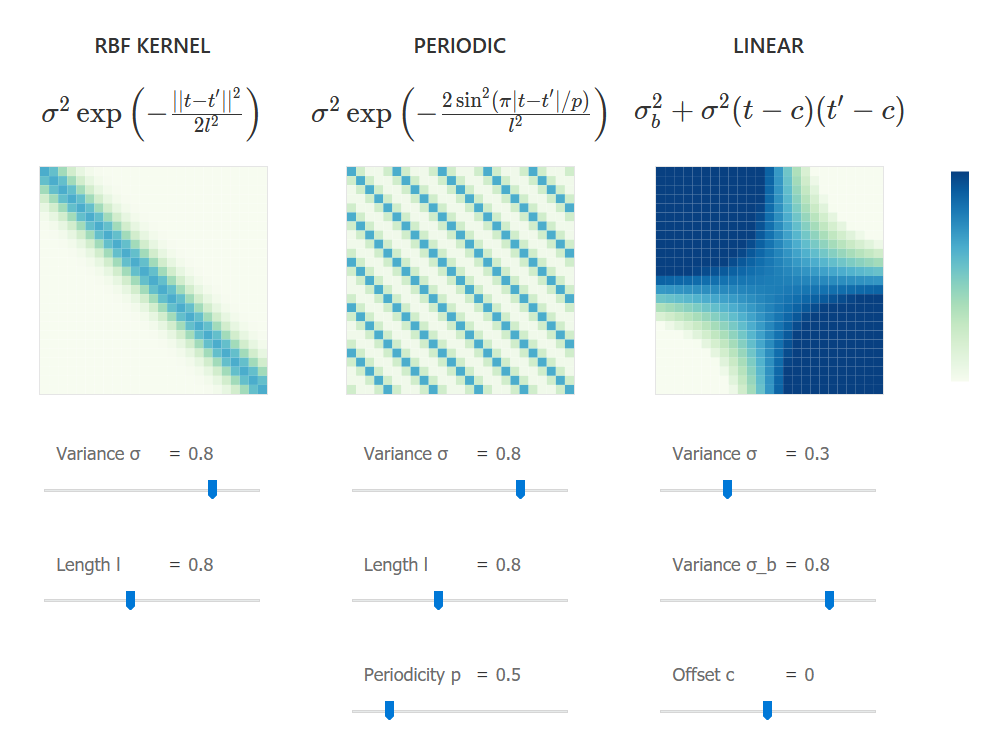

In [27]:
Image(filename = gaussian_img_path + "kernel_comparison.png", width=500, height=500)

Quelle: https://distill.pub/2019/visual-exploration-gaussian-processes/

Das heißt also, wir können Expertenwissen in unsere Regression einfließen lassen, z.B. wenn wir wissen dass den Daten irgendeine Art von periodische Natur zugrunde liegt. <br>
Doch was machen wir, wenn unseren Daten ein linearer Trend mit periodischen Schwankungen zu Grunde liegt? 
Hier kommt eine besondere Eigenschaft der Kernel-Funktionen ins Spiel, sie lassen sich kombinieren. Kombinieren heißt in diesem Fall das Anwenden von mathematischen Operationen, welche die Eigenschaft erhalten dass die Matrix positiven semi-definit ist.

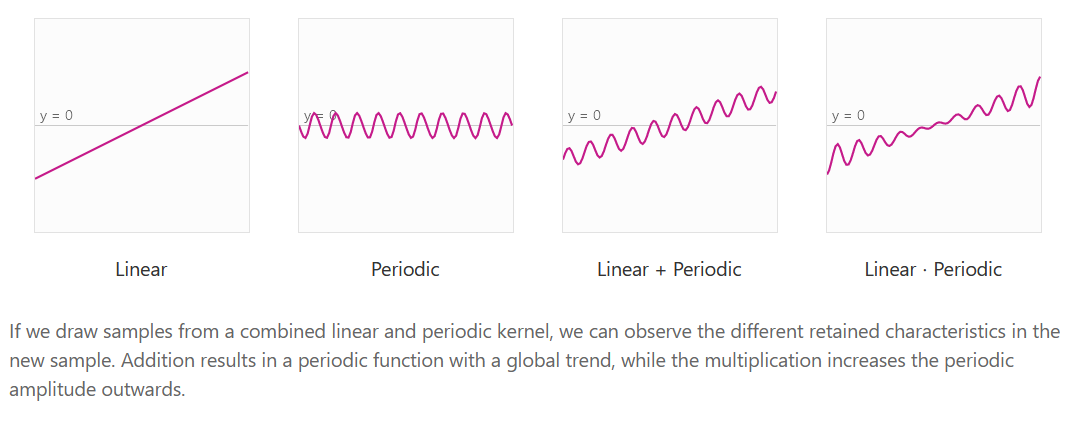

In [28]:
Image(filename = gaussian_img_path + "combining_kernels.png", width=500, height=500)

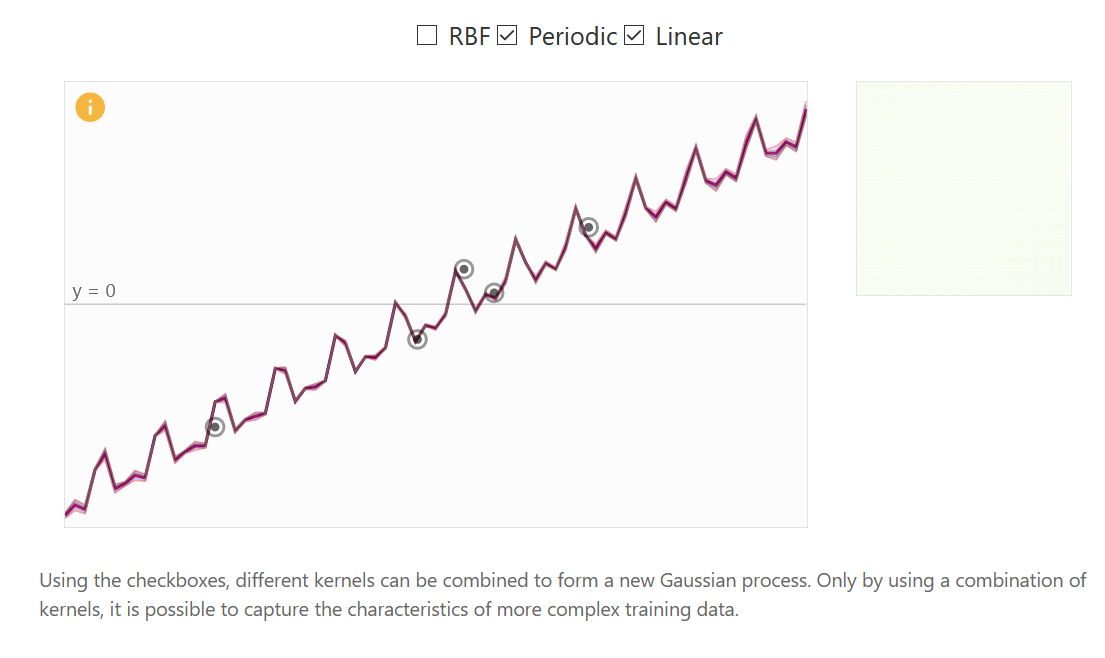

In [29]:
Image(filename = gaussian_img_path + "periodic_linear_kernel.png", width=500, height=500)

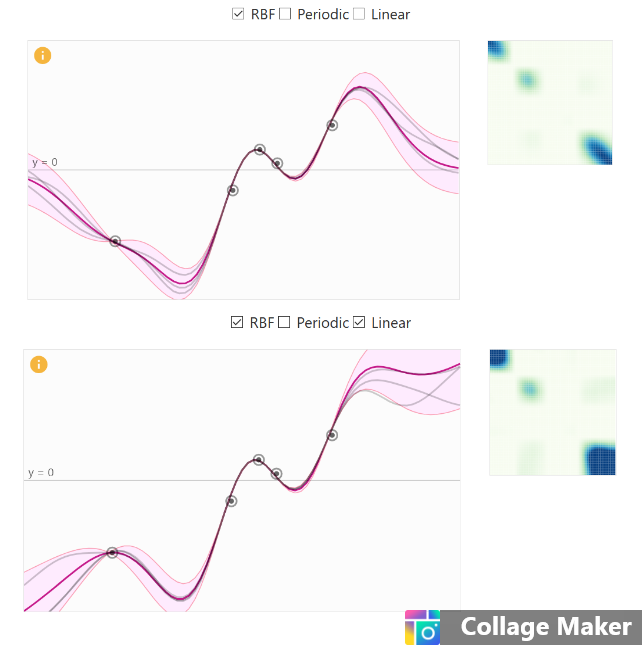

In [30]:
Image(filename = gaussian_img_path + "rbf_linear_kernel.jpg", width=500, height=500)

## Hpyerparameter-Optimierung

### Bayesian-Optimization

#### Warum Gauss-Prozesse?

#### Die Auswahl des nächsten Punktes - Die Acquisition function

#### Der Prozess der Optimierung

#### TPE - Tree Parzen Estimator